# Old

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('../../results/MetaPhlAn4_bbmap/merged_abundance_table.txt', 'r') as file:
    lines = file.readlines()

# Filter the lines
filtered_lines = [line for line in lines if re.search('s__|clade', line) and not re.search('t__', line)]

# Process the lines
processed_lines = []
for line in filtered_lines:
    line = re.sub('^.*\\|', '', line)
    line = re.sub('SRS[0-9]*-', '', line)
    processed_lines.append(line)

# Convert the processed lines to a DataFrame
df = pd.DataFrame([line.split('\t') for line in processed_lines])

# If the first row of your data contains column names, you can do:
df.columns = df.iloc[0]
df = df[1:]
df = df.set_index('clade_name')
df = df.apply(pd.to_numeric)
df.index.name = None

In [3]:
df.index.name = None
df

,0010001_Burn_030_LeftLeg_metaphlan4,0010003_Burn_031_LeftGroin_metaphlan4,0010004_Burn_031_RightHand_metaphlan4,0010006_Burn_030_RightLeg_metaphlan4,0010007_Burn_031_Sternal_metaphlan4,0010008_Burn_031_RightForearm_metaphlan4,0010009_unknown_Nasal_Nostrilright_metaphlan4,0010010_Burn_034_RightLeg_metaphlan4,0010011_Burn_031_HealthySkin_RightArm_metaphlan4,0010012_Burn_031_LeftShoulder_metaphlan4,...,0010017_Burn_034_unknown_metaphlan4,0010018_Burn_034_RightLeg1_metaphlan4,0010019_Burn_033_LeftHand_metaphlan4,0010020_unknown_Nasal_Nostrilleft_metaphlan4,0010021_Burn_033_RightFlank_metaphlan4,0010023_Burn_034_RightLeg2_metaphlan4,0010024_Burn_033_RightFlank1_metaphlan4,0010025_Burn_033_LeftArm_metaphlan4,0010026_Burn_031_RightLeg_metaphlan4,0010027_Burn_035_RightArm_metaphlan4\n
s__Corynebacterium_accolens,0.0,0.0,0.0,0.0,0.0,0.0,80.02952,0.00000,0.0,0.0,...,0.0,0.0,0.0,72.09250,0.0,0.0,0.0,0.0,0.00000,0.00000
s__Cutibacterium_acnes,0.0,0.0,0.0,0.0,0.0,0.0,7.88198,0.00000,0.0,0.0,...,0.0,0.0,0.0,7.13729,0.0,0.0,0.0,0.0,0.00000,0.00000
s__GGB2722_SGB3663,0.0,0.0,0.0,0.0,0.0,0.0,5.08663,0.00000,0.0,0.0,...,0.0,0.0,0.0,5.78092,0.0,0.0,0.0,0.0,0.00000,0.00000
s__Staphylococcus_epidermidis,0.0,0.0,0.0,0.0,0.0,0.0,4.07252,0.00000,0.0,0.0,...,0.0,0.0,0.0,6.65095,0.0,0.0,0.0,0.0,0.00000,0.00000
s__Corynebacterium_kefirresidentii,0.0,0.0,0.0,0.0,0.0,0.0,1.60900,0.00000,0.0,0.0,...,0.0,0.0,0.0,1.81062,0.0,0.0,0.0,0.0,0.00000,0.00000
s__Malassezia_restricta,0.0,0.0,0.0,0.0,0.0,0.0,0.70747,0.00000,0.0,0.0,...,0.0,0.0,0.0,3.19271,0.0,0.0,0.0,0.0,0.00000,0.00000
s__Peptoniphilus_lacydonensis,0.0,0.0,0.0,0.0,0.0,0.0,0.21040,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.87945,0.0,0.0,0.0,0.0,0.00000,0.00000
s__Anaerococcus_octavius,0.0,0.0,0.0,0.0,0.0,0.0,0.18970,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.79920,0.0,0.0,0.0,0.0,0.00000,0.00000
s__GGB2949_SGB6657,0.0,0.0,0.0,0.0,0.0,0.0,0.14209,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.45806,0.0,0.0,0.0,0.0,0.00000,0.00000
s__Staphylococcus_capitis,0.0,0.0,0.0,0.0,0.0,0.0,0.07069,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.09991,0.0,0.0,0.0,0.0,36.98461,0.00000


In [5]:
df.sum()

0
0010001_Burn_030_LeftLeg_metaphlan4                   0.00000
0010003_Burn_031_LeftGroin_metaphlan4                 0.00000
0010004_Burn_031_RightHand_metaphlan4                 0.00000
0010006_Burn_030_RightLeg_metaphlan4                  0.00000
0010007_Burn_031_Sternal_metaphlan4                   0.00000
0010008_Burn_031_RightForearm_metaphlan4              0.00000
0010009_unknown_Nasal_Nostrilright_metaphlan4       100.00000
0010010_Burn_034_RightLeg_metaphlan4                100.00000
0010011_Burn_031_HealthySkin_RightArm_metaphlan4    100.00000
0010012_Burn_031_LeftShoulder_metaphlan4            100.00000
0010013_Burn_031_RightForearm1_metaphlan4             0.00000
0010014_Burn_035_Abdomen_metaphlan4                 100.00000
0010015_Burn_031_LeftLowerLeg_metaphlan4              0.00000
0010016_Burn_031_RightForearm2_metaphlan4             0.00000
0010017_Burn_034_unknown_metaphlan4                   0.00000
0010018_Burn_034_RightLeg1_metaphlan4                 0.00000
001001

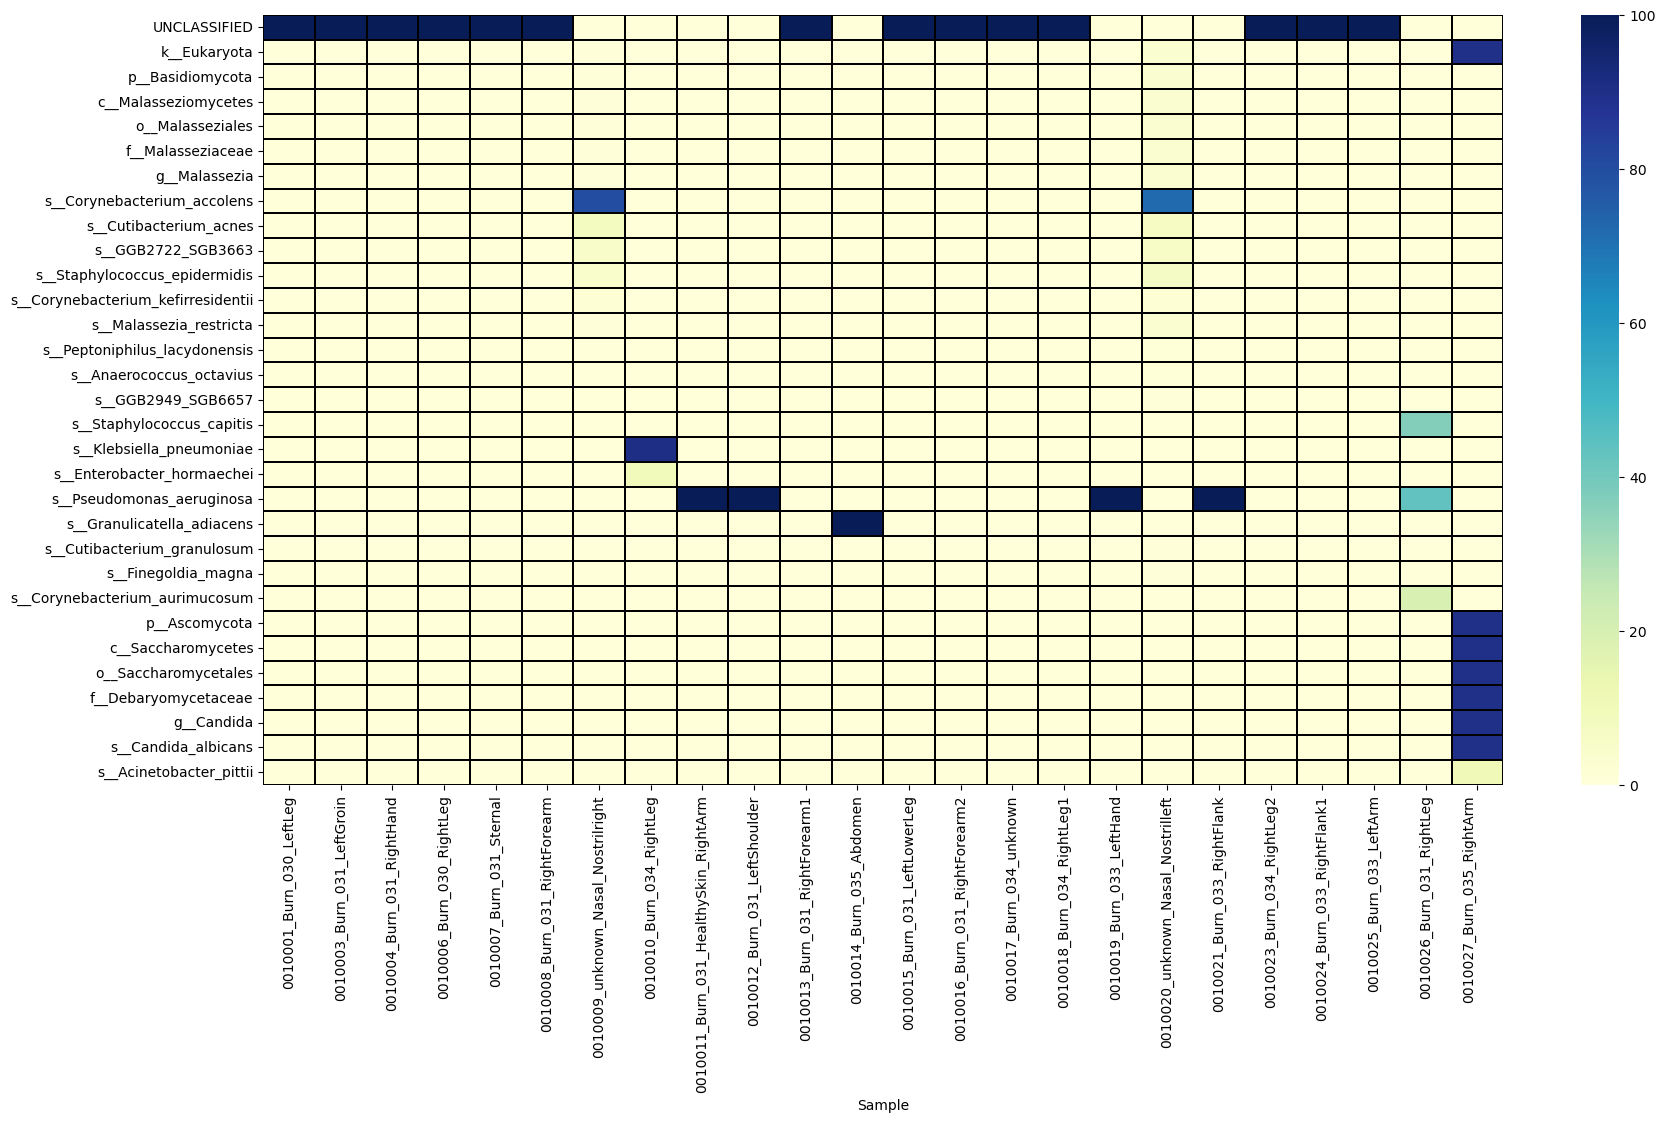

In [92]:
# Set the size of the figure
plt.figure(figsize=(20, 10))

# Generate the heatmap
sns.heatmap(df, cmap="YlGnBu", linecolor="black", linewidths=0.05)
plt.xlabel("Sample")

# Show the plot
plt.show()

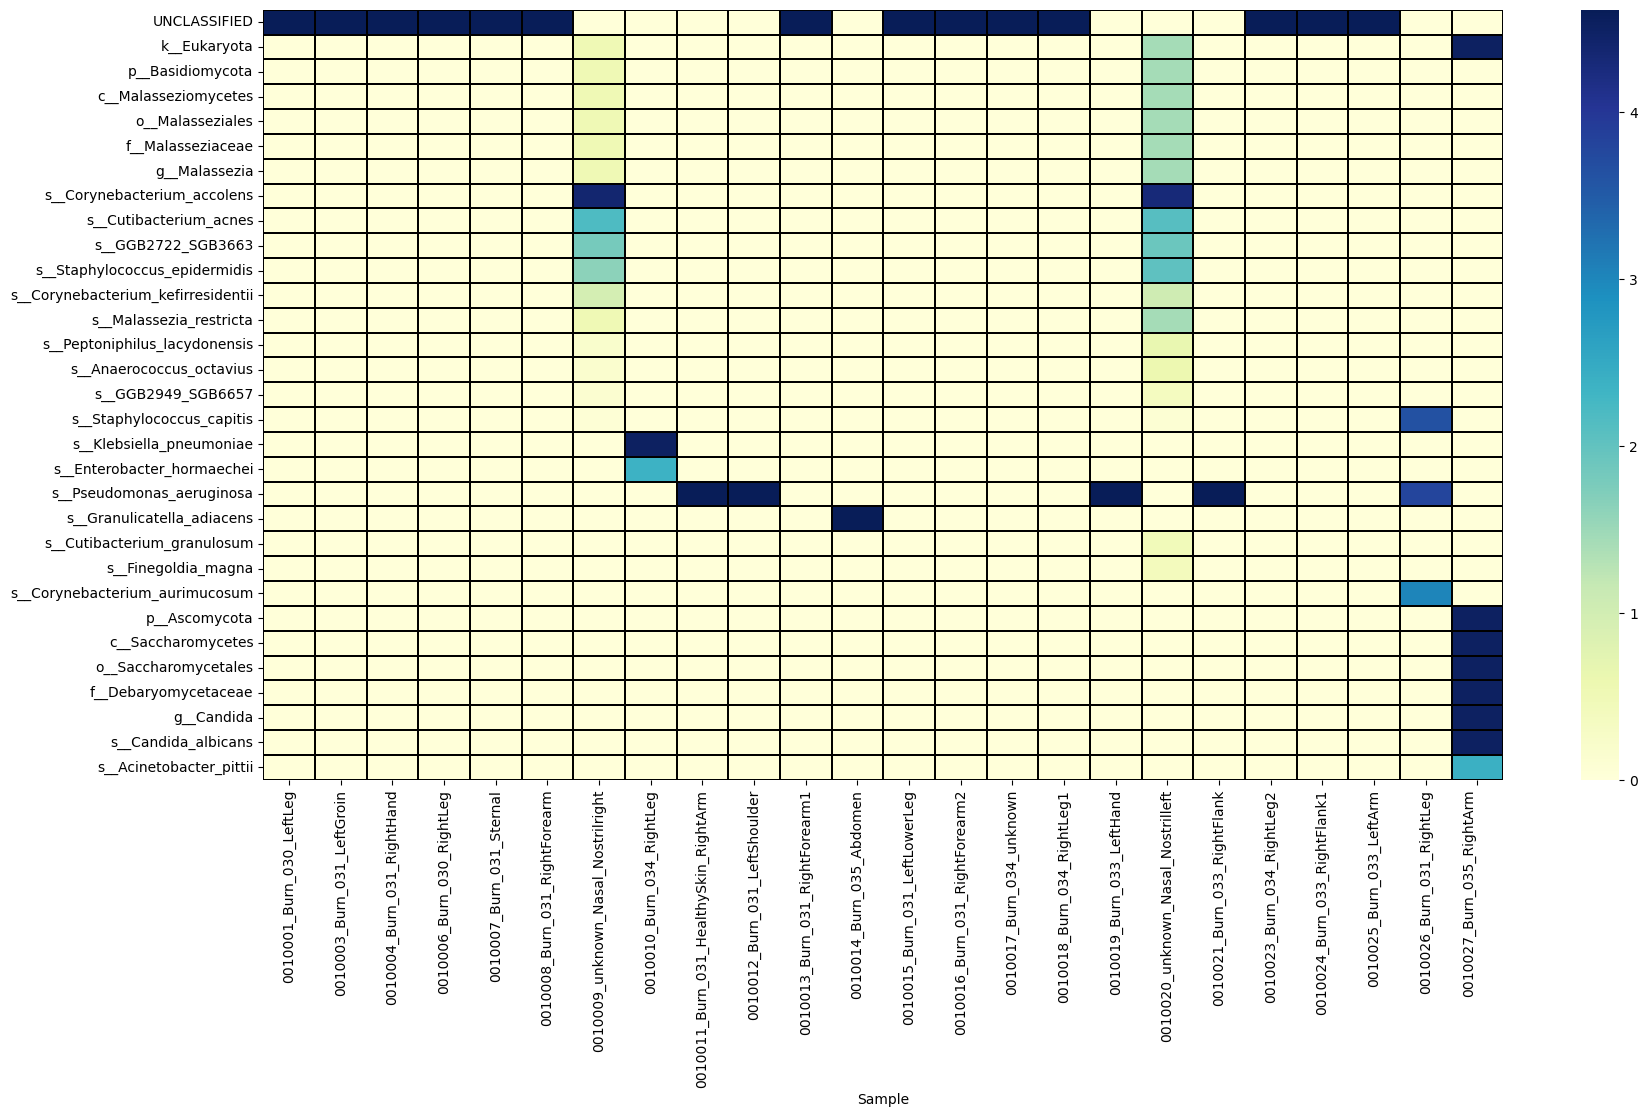

In [93]:
# Set the size of the figure
plt.figure(figsize=(20, 10))

# Generate the heatmap
sns.heatmap(np.log1p(df), cmap="YlGnBu", linecolor="black", linewidths=0.05)
plt.xlabel("Sample")

# Show the plot
plt.show()

In [122]:
with open('../../results/MetaPhlAn4/merged_abundance_table.txt', 'r') as file:
    lines = file.readlines()
    
# Filter the lines
filtered_lines = [line for line in lines if re.search('s__|clade|UNCLASSIFIED|k__Eukaryota', line) and not re.search('t__', line)]

# Process the lines
processed_lines = []
for line in filtered_lines:
    line = re.sub('^.*\\|', '', line)
    line = re.sub('SRS[0-9]*-', '', line)
    processed_lines.append(line)

# Convert the processed lines to a DataFrame
df2 = pd.DataFrame([line.split('\t') for line in processed_lines])

# If the first row of your data contains column names, you can do:
df2.columns = df2.iloc[0]
df2 = df2[1:]
df2 = df2.set_index('clade_name')
df2 = df2.apply(pd.to_numeric)
df2.index.name = None

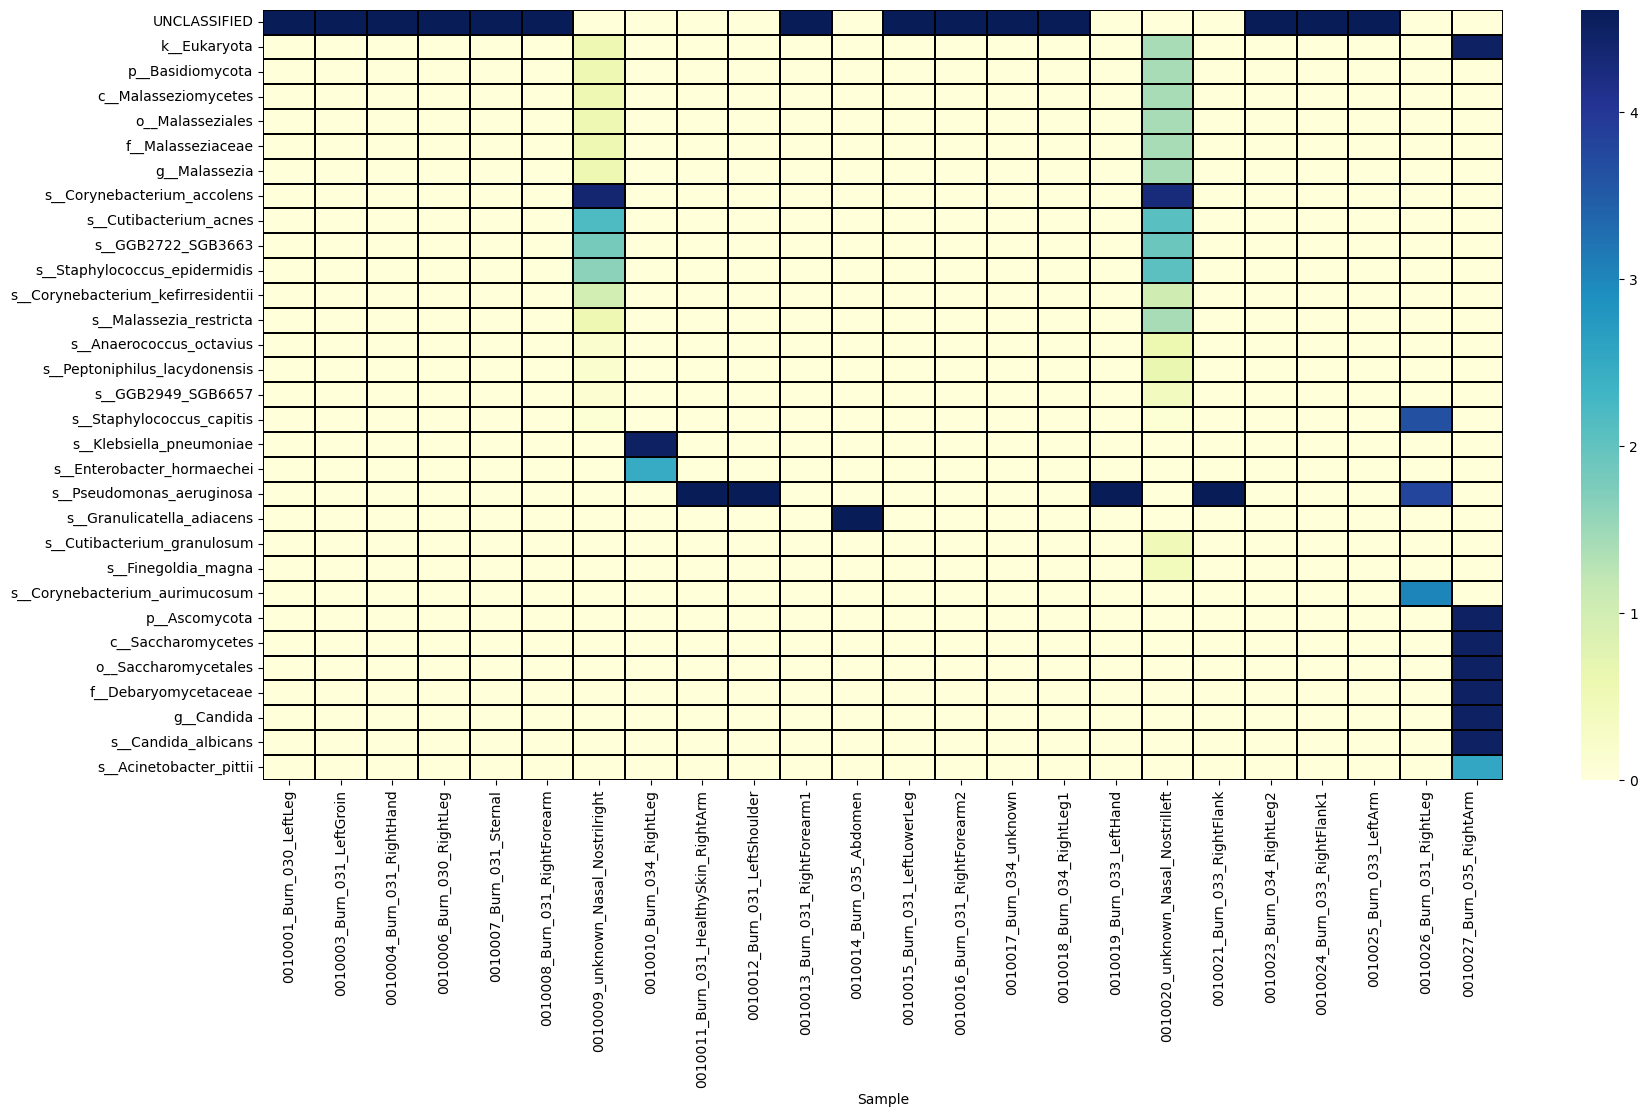

In [96]:
# Set the size of the figure
plt.figure(figsize=(20, 10))

# Generate the heatmap
sns.heatmap(np.log1p(df2), cmap="YlGnBu", linecolor="black", linewidths=0.05)
plt.xlabel("Sample")

# Show the plot
plt.show()

<Figure size 2000x1000 with 0 Axes>

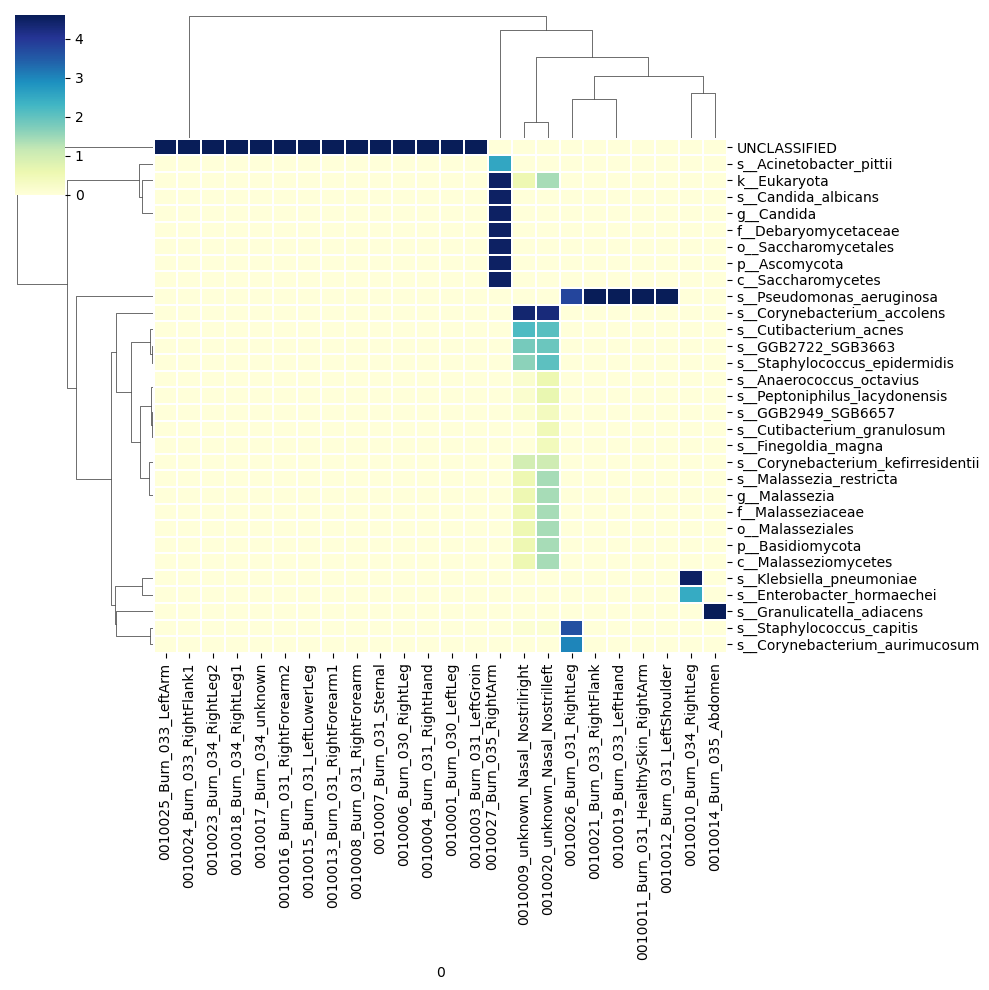

In [98]:
# Set the size of the figure
fig = plt.figure(figsize=(20, 10))

# Generate the heatmap with dendrogram
sns.clustermap(np.log1p(df2), cmap="YlGnBu", linewidths=0.05, method='ward')
plt.show()

In [107]:
df.head()

,0010001_Burn_030_LeftLeg,0010003_Burn_031_LeftGroin,0010004_Burn_031_RightHand,0010006_Burn_030_RightLeg,0010007_Burn_031_Sternal,0010008_Burn_031_RightForearm,0010009_unknown_Nasal_Nostrilright,0010010_Burn_034_RightLeg,0010011_Burn_031_HealthySkin_RightArm,0010012_Burn_031_LeftShoulder,...,0010017_Burn_034_unknown,0010018_Burn_034_RightLeg1,0010019_Burn_033_LeftHand,0010020_unknown_Nasal_Nostrilleft,0010021_Burn_033_RightFlank,0010023_Burn_034_RightLeg2,0010024_Burn_033_RightFlank1,0010025_Burn_033_LeftArm,0010026_Burn_031_RightLeg,0010027_Burn_035_RightArm\n
UNCLASSIFIED,100.0,100.0,100.0,100.0,100.0,100.0,0.00000,0.0,0.0,0.0,...,100.0,100.0,0.0,0.00000,0.0,100.0,100.0,100.0,0.0,0.00000
k__Eukaryota,0.0,0.0,0.0,0.0,0.0,0.0,0.70747,0.0,0.0,0.0,...,0.0,0.0,0.0,3.19271,0.0,0.0,0.0,0.0,0.0,89.80322
p__Basidiomycota,0.0,0.0,0.0,0.0,0.0,0.0,0.70747,0.0,0.0,0.0,...,0.0,0.0,0.0,3.19271,0.0,0.0,0.0,0.0,0.0,0.00000
c__Malasseziomycetes,0.0,0.0,0.0,0.0,0.0,0.0,0.70747,0.0,0.0,0.0,...,0.0,0.0,0.0,3.19271,0.0,0.0,0.0,0.0,0.0,0.00000
o__Malasseziales,0.0,0.0,0.0,0.0,0.0,0.0,0.70747,0.0,0.0,0.0,...,0.0,0.0,0.0,3.19271,0.0,0.0,0.0,0.0,0.0,0.00000


In [14]:
# assuming df is your DataFrame
non_zero_count_per_column = df.apply(lambda x: np.count_nonzero(x))

# convert the result to a DataFrame
df_non_zero_count = pd.DataFrame(non_zero_count_per_column, columns=['Count'])
df_non_zero_count.index.name = None
df_non_zero_count

,Count
0010001_Burn_030_LeftLeg,0
0010003_Burn_031_LeftGroin,0
0010004_Burn_031_RightHand,0
0010006_Burn_030_RightLeg,0
0010007_Burn_031_Sternal,0
0010008_Burn_031_RightForearm,0
0010009_unknown_Nasal_Nostrilright,10
0010010_Burn_034_RightLeg,2
0010011_Burn_031_HealthySkin_RightArm,1
0010012_Burn_031_LeftShoulder,1


clade_name: The taxonomic lineage of the taxon reported on this line, ranging from Kingdom (e.g. Bacteria/Archaea) to species genome bin (SGB). Taxon names are prefixed to help indicate their rank: Kingdom: k__, Phylum: p__, Class: c__, Order: o__, Family: f__, Genus: g__, Species: s__, and SGB: t__. We'll examine these more closely below.

In [3]:
with open('../../results/MetaPhlAn4/merged_abundance_table.txt', 'r') as file:
    lines = file.readlines()
    
# Filter the lines
filtered_lines = [line for line in lines if re.search('s__|clade', line) and not re.search('t__', line)]

# Process the lines
processed_lines = []
for line in filtered_lines:
    line = re.sub('^.*\\|', '', line)
    line = re.sub('SRS[0-9]*-', '', line)
    processed_lines.append(line)

# Convert the processed lines to a DataFrame
df2 = pd.DataFrame([line.split('\t') for line in processed_lines])

# If the first row of your data contains column names, you can do:
df2.columns = df2.iloc[0]
df2 = df2[1:]
df2 = df2.set_index('clade_name')
df2 = df2.apply(pd.to_numeric)
df2.index.name = None
df2.head()

,0010001_Burn_030_LeftLeg,0010003_Burn_031_LeftGroin,0010004_Burn_031_RightHand,0010006_Burn_030_RightLeg,0010007_Burn_031_Sternal,0010008_Burn_031_RightForearm,0010009_unknown_Nasal_Nostrilright,0010010_Burn_034_RightLeg,0010011_Burn_031_HealthySkin_RightArm,0010012_Burn_031_LeftShoulder,...,0010017_Burn_034_unknown,0010018_Burn_034_RightLeg1,0010019_Burn_033_LeftHand,0010020_unknown_Nasal_Nostrilleft,0010021_Burn_033_RightFlank,0010023_Burn_034_RightLeg2,0010024_Burn_033_RightFlank1,0010025_Burn_033_LeftArm,0010026_Burn_031_RightLeg,0010027_Burn_035_RightArm\n
s__Corynebacterium_accolens,0.0,0.0,0.0,0.0,0.0,0.0,79.70337,0.0,0.0,0.0,...,0.0,0.0,0.0,71.97667,0.0,0.0,0.0,0.0,0.0,0.0
s__Cutibacterium_acnes,0.0,0.0,0.0,0.0,0.0,0.0,7.99564,0.0,0.0,0.0,...,0.0,0.0,0.0,7.06480,0.0,0.0,0.0,0.0,0.0,0.0
s__GGB2722_SGB3663,0.0,0.0,0.0,0.0,0.0,0.0,5.15132,0.0,0.0,0.0,...,0.0,0.0,0.0,5.85344,0.0,0.0,0.0,0.0,0.0,0.0
s__Staphylococcus_epidermidis,0.0,0.0,0.0,0.0,0.0,0.0,4.13937,0.0,0.0,0.0,...,0.0,0.0,0.0,6.73935,0.0,0.0,0.0,0.0,0.0,0.0
s__Corynebacterium_kefirresidentii,0.0,0.0,0.0,0.0,0.0,0.0,1.68130,0.0,0.0,0.0,...,0.0,0.0,0.0,1.79947,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 2500x1000 with 0 Axes>

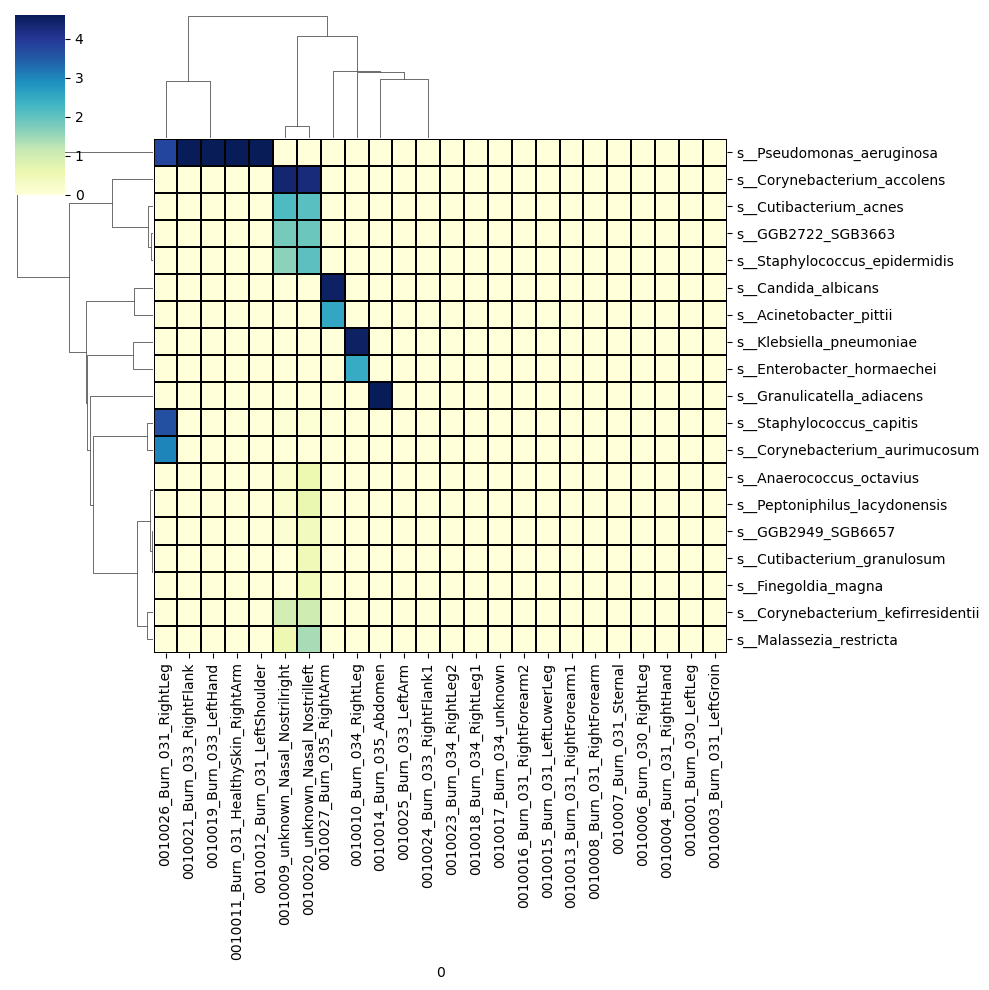

In [5]:
# Set the size of the figure
fig = plt.figure(figsize=(25, 10))

# Generate the heatmap with dendrogram
sns.clustermap(np.log1p(df2), cmap="YlGnBu", linewidths=0.1, linecolor = "black" ,method='ward')
plt.show()

In [ ]:
with open('../../results/Kraken2/merged_kraken2_report.csv
    lines = file.readlines()

# Filter the lines
filtered_lines = [line for line in lines if re.search('s__|clade', line) and not re.search('t__', line)]

# Process the lines
processed_lines = []
for line in filtered_lines:
    line = re.sub('^.*\\|', '', line)
    line = re.sub('SRS[0-9]*-', '', line)
    processed_lines.append(line)

# Convert the processed lines to a DataFrame
df = pd.DataFrame([line.split('\t') for line in processed_lines])

# If the first row of your data contains column names, you can do:
df.columns = df.iloc[0]
df = df[1:]
df = df.set_index('clade_name')
df = df.apply(pd.to_numeric)
df.index.name = None

In [12]:
kraken_txt1 = pd.read_table("../../results/Kraken2/0010001_Burn_030_LeftLeg_kraken2_report.txt", sep = "\t", header = None)
kraken_txt1

,0,1
0,d__Eukaryota,5301272
1,d__Eukaryota|k__Metazoa,5299545
2,d__Eukaryota|k__Metazoa|p__Chordata,5299545
3,d__Eukaryota|k__Metazoa|p__Chordata|c__Mammalia,5299545
4,d__Eukaryota|k__Metazoa|p__Chordata|c__Mammali...,5299545
...,...,...
1268,d__Viruses|k__Bamfordvirae|p__Nucleocytovirico...,1
1269,d__Viruses|k__Bamfordvirae|p__Nucleocytovirico...,1
1270,d__Viruses|k__Bamfordvirae|p__Nucleocytovirico...,1
1271,d__Viruses|k__Bamfordvirae|p__Nucleocytovirico...,1


In [34]:
# Extract part of the filename
filename = "../../results/Kraken2/0010001_Burn_030_LeftLeg_kraken2_report.txt" 
part_of_filename = "_".join(filename.split('/')[-1].split('_')[:-2])  

# Read the txt file into a DataFrame with specified column names
kraken_txt1 = pd.read_csv(filename, sep="\t", header=None, names=['clade', part_of_filename])

In [33]:
# Extract part of the filename
filename = "../../results/Kraken2/0010027_Burn_035_RightArm_kraken2_report.txt" 
part_of_filename = "_".join(filename.split('/')[-1].split('_')[:-2])  

# Read the txt file into a DataFrame with specified column names
kraken_txt2 = pd.read_csv(filename, sep="\t", header=None, names=['clade', part_of_filename])


In [31]:
merged_kraken = pd.merge(kraken_txt1, kraken_txt2, on='clade', how='outer')
merged_kraken.fillna(0, inplace=True)
merged_kraken

,clade,0010001_Burn_030_LeftLeg,0010027_Burn_035_RightArm
0,d__Eukaryota,5301272.0,6065201.0
1,d__Eukaryota|k__Metazoa,5299545.0,6046048.0
2,d__Eukaryota|k__Metazoa|p__Chordata,5299545.0,6046048.0
3,d__Eukaryota|k__Metazoa|p__Chordata|c__Mammalia,5299545.0,6046048.0
4,d__Eukaryota|k__Metazoa|p__Chordata|c__Mammali...,5299545.0,6046048.0
...,...,...,...
2311,d__Viruses|c__Naldaviricetes|o__Lefavirales|f_...,0.0,1.0
2312,d__Viruses|c__Naldaviricetes|o__Lefavirales|f_...,0.0,1.0
2313,d__Viruses|k__Bamfordvirae|p__Nucleocytovirico...,0.0,1.0
2314,d__Viruses|k__Bamfordvirae|p__Nucleocytovirico...,0.0,1.0


In [6]:
kraken_csv = pd.read_csv("../../results/Kraken2/merged_kraken2_report.csv")
kraken_csv.head()

,clade,0010017_Burn_034_unknown,0010006_Burn_030_RightLeg,0010003_Burn_031_LeftGroin,0010012_Burn_031_LeftShoulder,0010008_Burn_031_RightForearm,0010025_Burn_033_LeftArm,0010015_Burn_031_LeftLowerLeg,0010010_Burn_034_RightLeg,0010004_Burn_031_RightHand,...,0010019_Burn_033_LeftHand,0010011_Burn_031_HealthySkin_RightArm,0010014_Burn_035_Abdomen,0010007_Burn_031_Sternal,0010016_Burn_031_RightForearm2,0010001_Burn_030_LeftLeg,0010027_Burn_035_RightArm,0010026_Burn_031_RightLeg,0010018_Burn_034_RightLeg1,0010024_Burn_033_RightFlank1
0,d__Eukaryota,5832637.0,9264216.0,6656460.0,5584613.0,3800883.0,7552360.0,7286451.0,5956818.0,3773477.0,...,7900648.0,5766075.0,7908726.0,5820290.0,4322830.0,5301272.0,6065201.0,7409272.0,7534510.0,3846416.0
1,d__Eukaryota|k__Metazoa,5828061.0,9259729.0,6652734.0,5583826.0,3799771.0,7548941.0,7283589.0,5953216.0,3768351.0,...,7897572.0,5762698.0,7904527.0,5815563.0,4322237.0,5299545.0,6046048.0,7406923.0,7529784.0,3845311.0
2,d__Eukaryota|k__Metazoa|p__Chordata,5828061.0,9259729.0,6652734.0,5583826.0,3799771.0,7548941.0,7283589.0,5953216.0,3768351.0,...,7897572.0,5762698.0,7904527.0,5815563.0,4322237.0,5299545.0,6046048.0,7406923.0,7529784.0,3845311.0
3,d__Eukaryota|k__Metazoa|p__Chordata|c__Mammalia,5828061.0,9259729.0,6652734.0,5583826.0,3799771.0,7548941.0,7283589.0,5953216.0,3768351.0,...,7897572.0,5762698.0,7904527.0,5815563.0,4322237.0,5299545.0,6046048.0,7406923.0,7529784.0,3845311.0
4,d__Eukaryota|k__Metazoa|p__Chordata|c__Mammali...,5828061.0,9259729.0,6652734.0,5583826.0,3799771.0,7548941.0,7283589.0,5953216.0,3768351.0,...,7897572.0,5762698.0,7904527.0,5815563.0,4322237.0,5299545.0,6046048.0,7406923.0,7529784.0,3845311.0


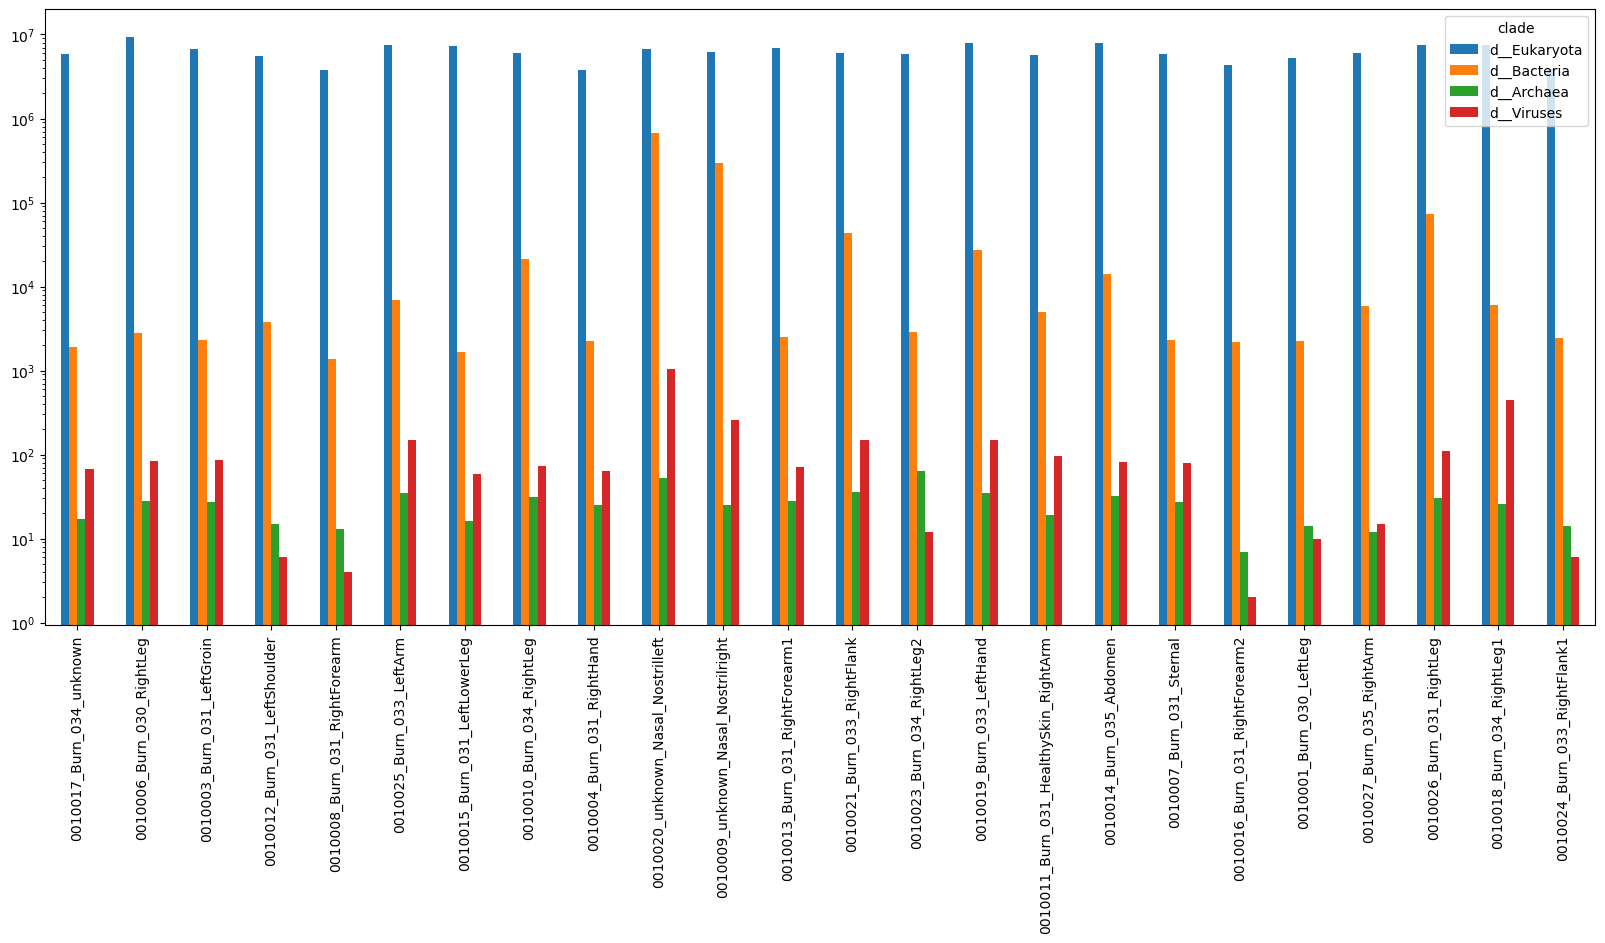

In [7]:
# Select the rows for d__Eukaryota, d__Bacteria and d__Archaea
selected_rows = kraken_csv[kraken_csv['clade'].isin(['d__Eukaryota', 'd__Bacteria', 'd__Archaea',"d__Viruses"])]

# Transpose the DataFrame so that the clades are the columns and the samples are the rows
transposed_df = selected_rows.set_index('clade').transpose()

# Plot a bar chart with a larger figure size
transposed_df.plot(kind='bar', figsize=(20, 8))

# Set the y-axis to a log scale
plt.yscale('log')

# Show the plot
plt.show()

/sctmp/tdemet/ipykernel_2859187/9602377.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['clade'] = selected_rows['clade'].apply(lambda x: re.search('s__(.*)', x).group(1) if re.search('s__(.*)', x) else x)
/home/tdemet/data/conda/envs/kraken2_env/lib/pypy3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/tdemet/data/conda/envs/kraken2_env/lib/pypy3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


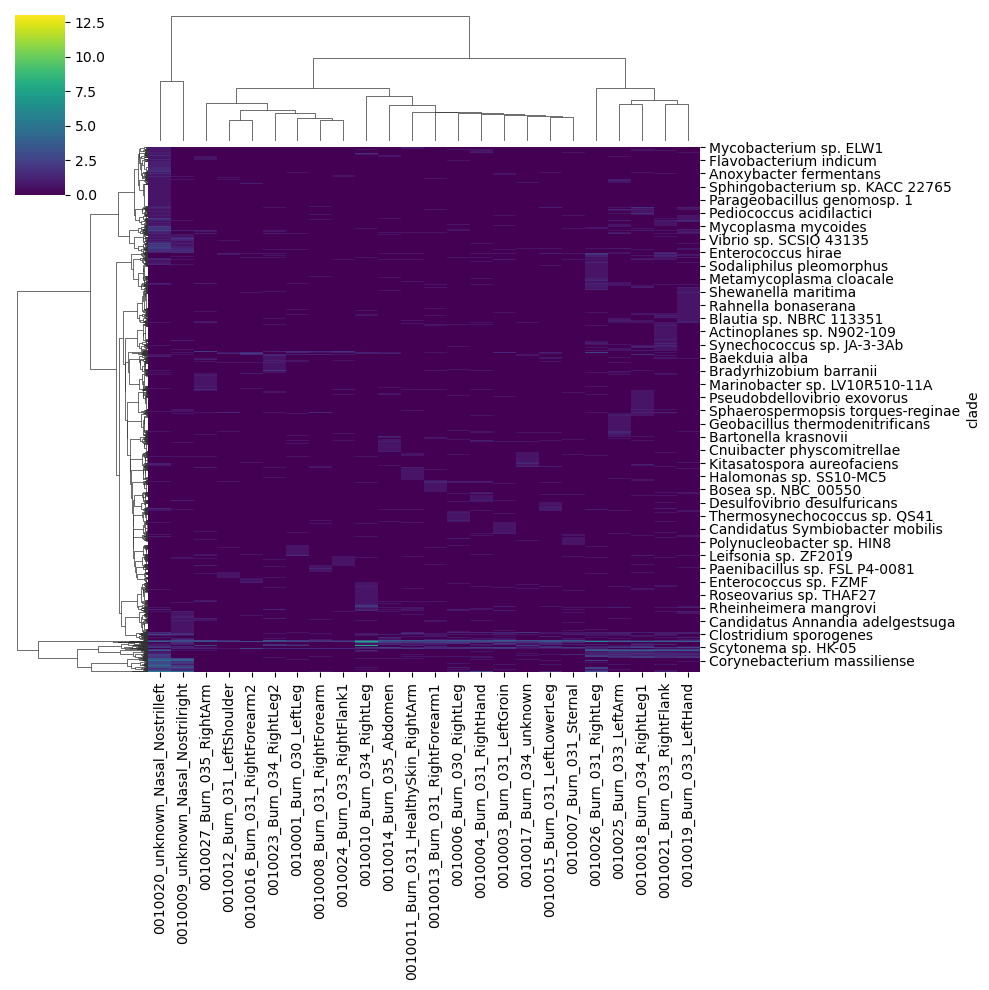

In [8]:
# Select the rows for clades that contain 'd__Bacteria' and '|s__'
selected_rows = kraken_csv[kraken_csv['clade'].str.contains('d__Bacteria') & kraken_csv['clade'].str.contains('|s__')]

# Further filter rows that contain 's__'
selected_rows = selected_rows[selected_rows["clade"].str.contains('s__')]

# Extract the part of the 'clade' column after 's__'
selected_rows['clade'] = selected_rows['clade'].apply(lambda x: re.search('s__(.*)', x).group(1) if re.search('s__(.*)', x) else x)

# Set 'clade' as the index
selected_rows.set_index("clade", inplace=True)

# Create a clustermap (heatmap with dendrograms)
sns.clustermap(np.log1p(selected_rows), method='ward', cmap='viridis')

# Show the plot
plt.show()

In [56]:
counts = pd.DataFrame(selected_rows.astype(bool).sum())

In [9]:
# Create a bar plot
counts.plot(kind='bar', legend=False, figsize=(20, 8))

# Set the title and labels
plt.xlabel('Sample')
plt.ylabel('Number of unique species')

# Show the plot
plt.show()

NameError: name 'counts' is not defined

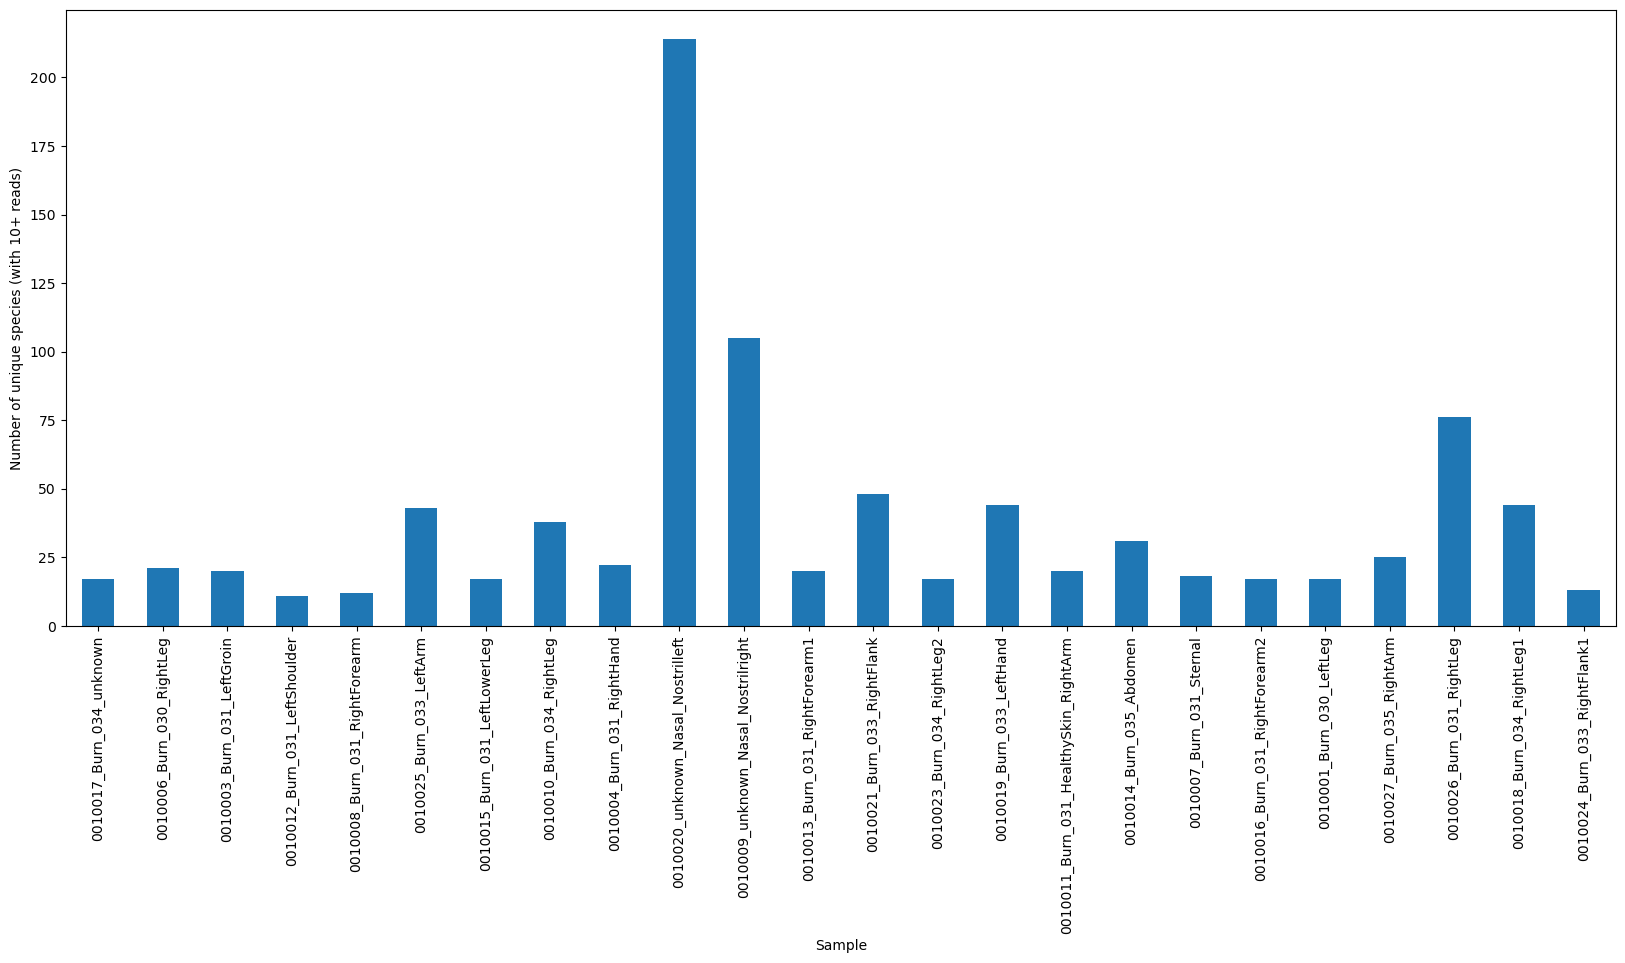

In [59]:
# Replace all values less than 10 by 0
selected_rows = selected_rows.where(selected_rows >= 10, 0)

# Now calculate the counts
counts = pd.DataFrame(selected_rows.astype(bool).sum())

# Create a bar plot
counts.plot(kind='bar', legend=False, figsize=(20, 8))

# Set the title and labels
plt.xlabel('Sample')
plt.ylabel('Number of unique species (with 10+ reads)')

# Show the plot
plt.show()

# New

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [28]:
def kingdom_stacked(df):
    # Filter the DataFrame
    filtered_df = df[df['clade_name'].isin(['unclassified', 'k__Bacteria', 'k__Eukaryota'])]

    # Pivot the DataFrame
    pivot_df = filtered_df.pivot(index='sample', columns='clade_name', values='relative_abundance')

    # Create the plot with 'Accent' colormap
    fig, ax = plt.subplots(figsize=(15, 10))
    pivot_df.plot(kind='bar', stacked=True, ax=ax, edgecolor='black')

    # Set the Seaborn style
    sns.set()

    # Add labels and title
    ax.set_xlabel('Sample')
    ax.set_ylabel('Relative Abundance')
    ax.set_title('Relative Abundance per Sample')

    # Move the legend outside of the figure
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Close the figure
    plt.close()

    return fig


In [29]:
def create_species_plot(df):
    # Filter the DataFrame
    filtered_df = df[df['clade_name'].str.contains('s__')].copy()

    # Drop the column if it exists
    if 'clade_taxid' in filtered_df.columns:
        filtered_df = filtered_df.drop(columns = "clade_taxid")

    # Cut the names
    filtered_df['clade_name'] = filtered_df['clade_name'].str.split('s__').str[-1]
    filtered_df = filtered_df[~filtered_df['clade_name'].str.contains('t__')]

    # Pivot the DataFrame to get the data in the right format for the plot
    pivot_df = filtered_df.pivot(index='sample', columns='clade_name', values='relative_abundance')

    # Create the stacked bar plot
    fig, ax = plt.subplots(figsize=(15, 10))
    pivot_df.plot(kind='bar', stacked=True, ax=ax, edgecolor='black')

    # Set the Seaborn style
    sns.set()

    # Add labels and title
    ax.set_xlabel('Sample')
    ax.set_ylabel('Relative Abundance by MetaPhlAn4')
    ax.set_title('Relative Abundance per Sample')

    # Move the legend outside of the figure
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.tick_params(axis='x', labelsize=16)

    # Close the figure
    plt.close()

    return fig

## metaphlan

In [35]:
metaphlan_bowtie = pd.read_csv("../../results/MetaPhlAn4/output_merged.csv")
metaphlan_bbmap = process_files("../../results/MetaPhlAn4_bbmap/")

In [30]:
metaphlan_kingdom_bowtie = kingdom_stacked(test_m)

In [37]:
metaphlan_kingdom_bbmap = kingdom_stacked(metaphlan_bbmap)

In [38]:
metaphlan_species_bowtie = create_species_plot(metaphlan_bowtie)

In [39]:
metaphlan_species_bbmap = create_species_plot(metaphlan_bbmap)

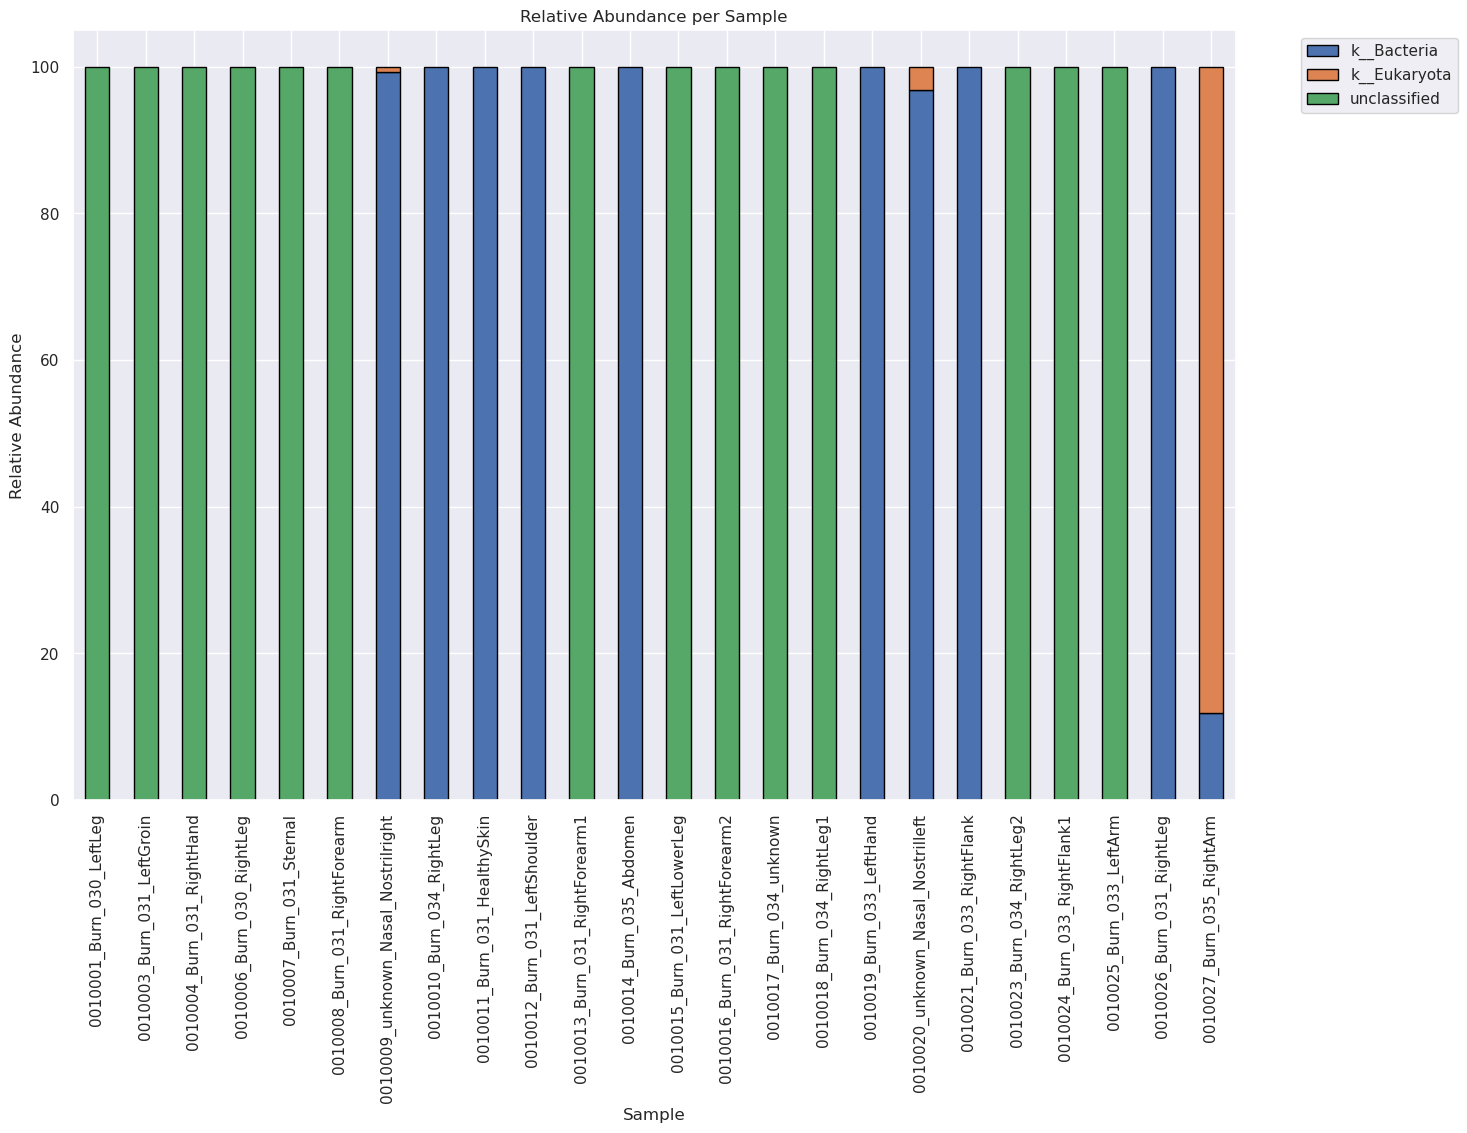

In [31]:
metaphlan_kingdom_bowtie

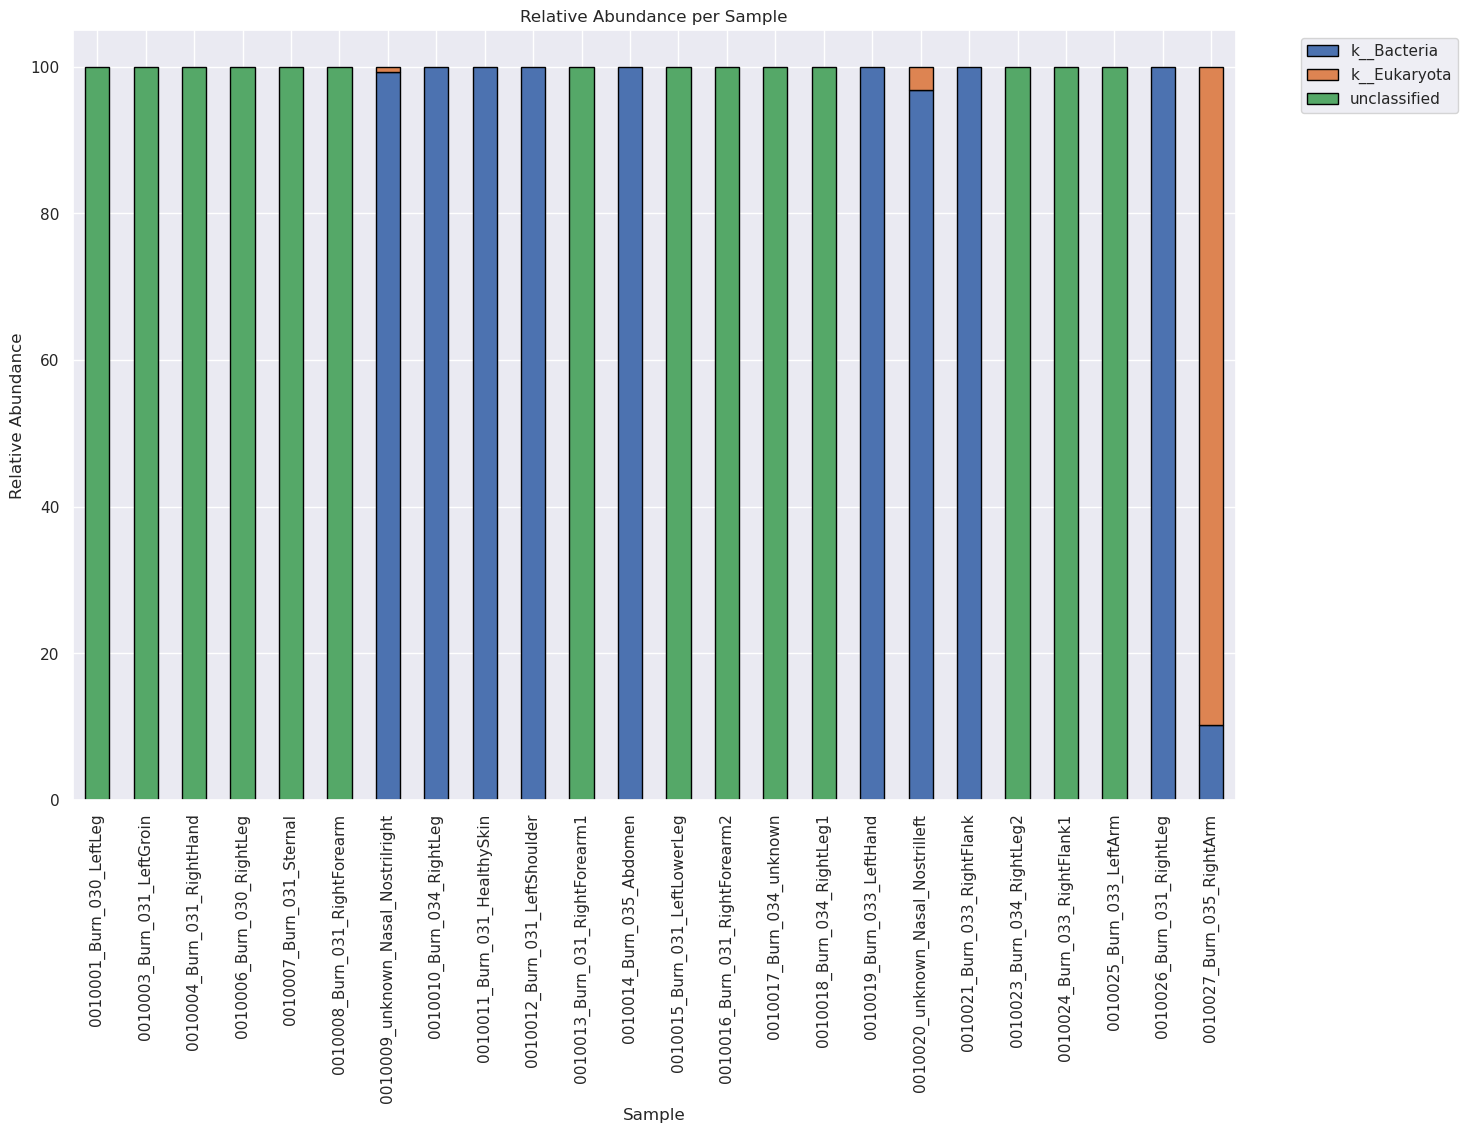

In [41]:
metaphlan_kingdom_bbmap

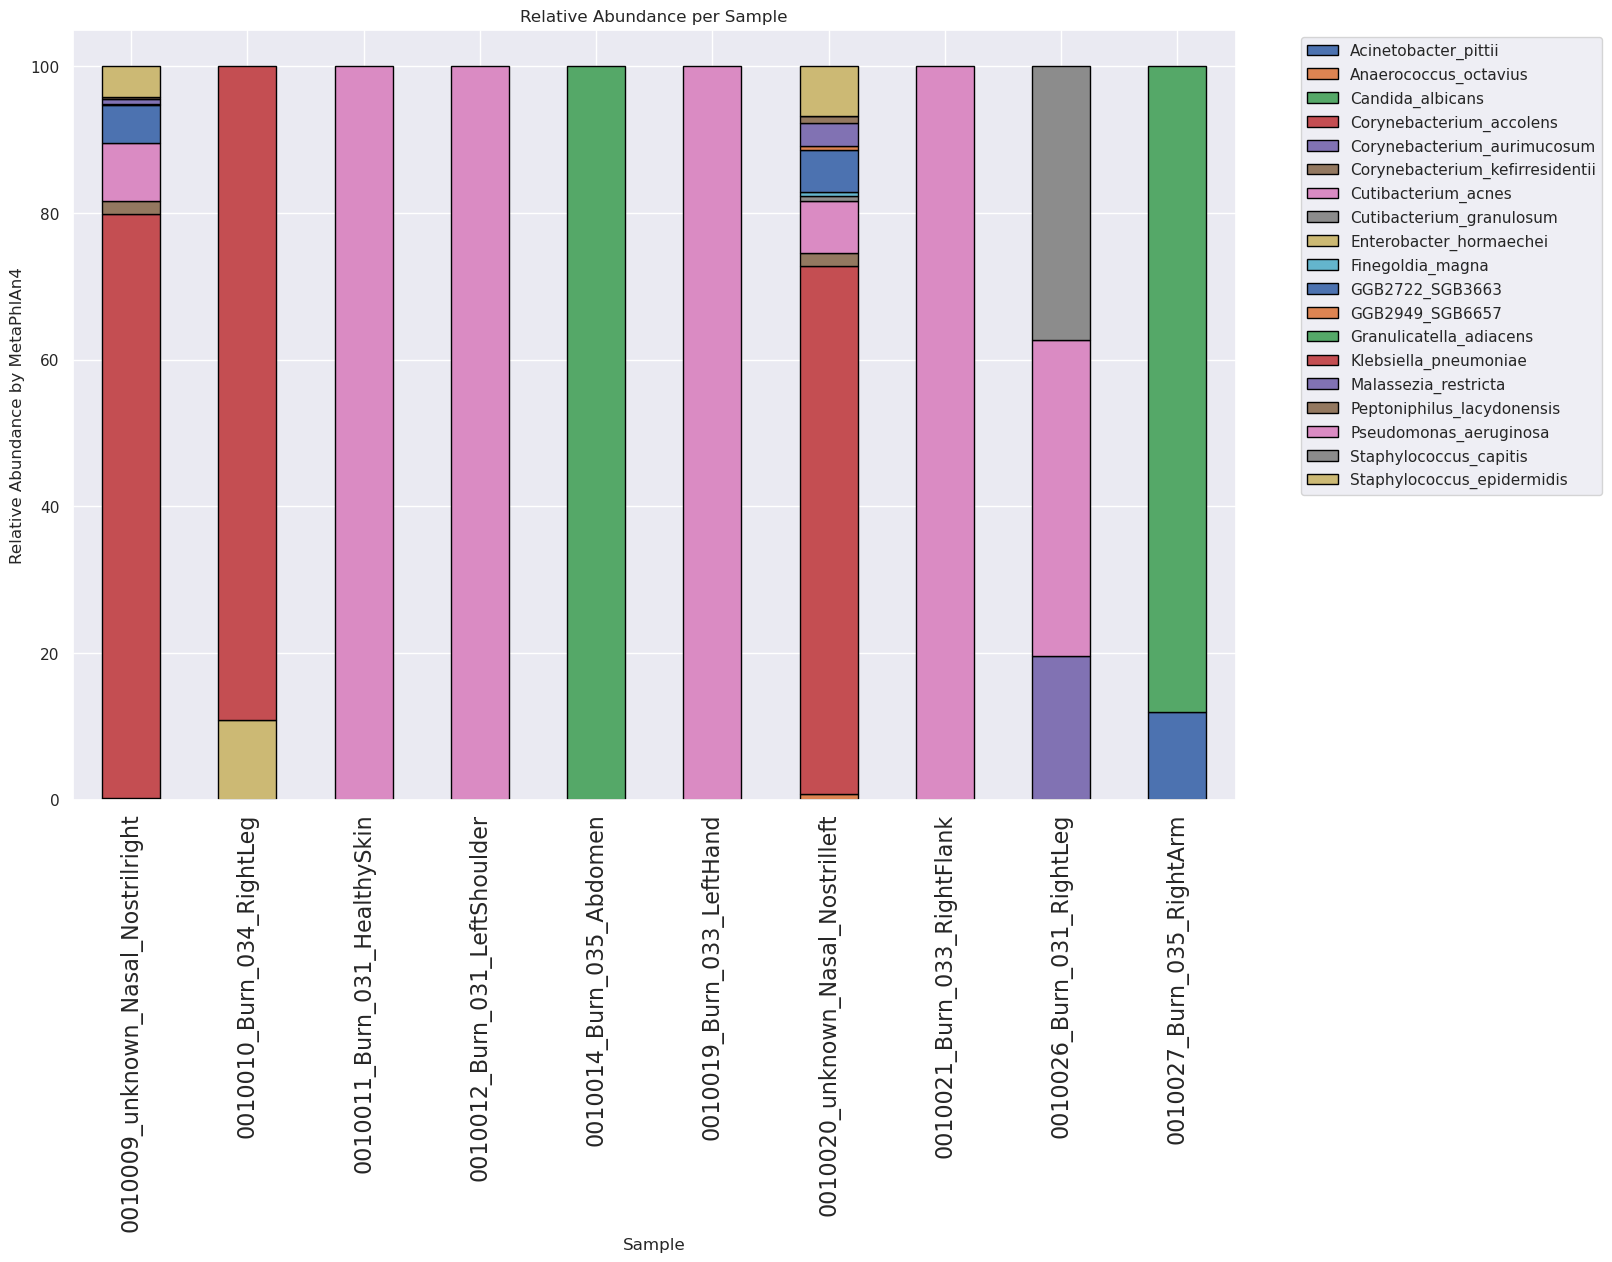

In [42]:
metaphlan_species_bowtie

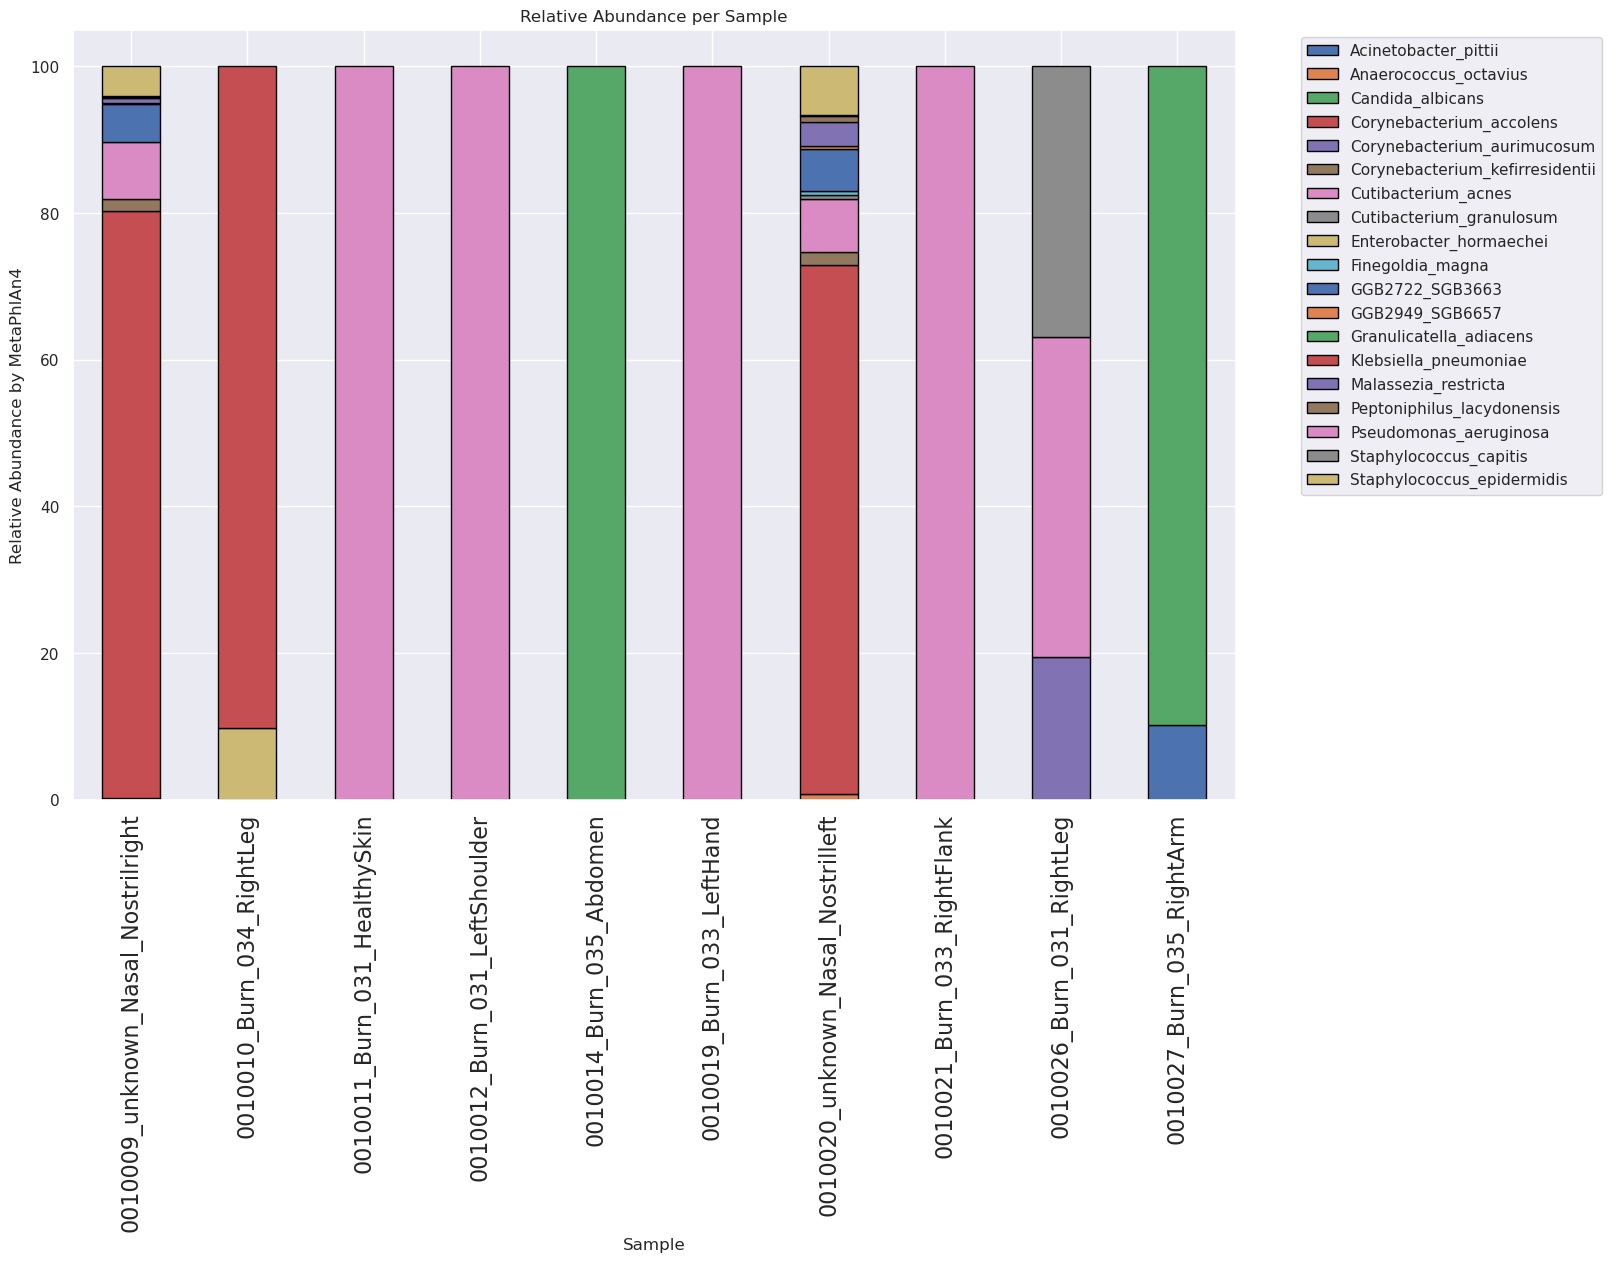

In [43]:
metaphlan_species_bbmap

In [15]:
metaphlan_bowtie.head()

,clade_name,clade_taxid,relative_abundance,coverage,estimated_number_of_reads_from_the_clade,sample
0,unclassified,-1,100.0,0.0,0.0,0010003_Burn_031_LeftGroin
0,unclassified,-1,100.0,0.0,0.0,0010001_Burn_030_LeftLeg
0,unclassified,-1,100.0,0.0,0.0,0010018_Burn_034_RightLeg1
0,unclassified,-1,100.0,0.0,0.0,0010004_Burn_031_RightHand
0,unclassified,-1,100.0,0.0,0.0,0010016_Burn_031_RightForearm2


## kraken

In [2]:
kraken_bowtie = pd.read_csv("../../results/Kraken2/metaphlan_style_reports/kraken2_output_merged.csv")

In [3]:
def kingdom_stacked_kraken(df):
    # Filter the DataFrame
    filtered_df = df[df['clade_name'].isin(['x__unclassified', 'd__Bacteria', 'd__Eukaryota'])]

    # Pivot the DataFrame
    pivot_df = filtered_df.pivot(index='sample', columns='clade_name', values='relative_abundance')

    # Create the plot with 'Accent' colormap
    fig, ax = plt.subplots(figsize=(15, 10))
    pivot_df.plot(kind='bar', stacked=True, ax=ax, edgecolor='black')

    # Set the Seaborn style
    sns.set()

    # Add labels and title
    ax.set_xlabel('Sample')
    ax.set_ylabel('Relative Abundance')
    ax.set_title('Relative Abundance per Sample')

    # Move the legend outside of the figure
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Close the figure
    plt.close()

    return fig

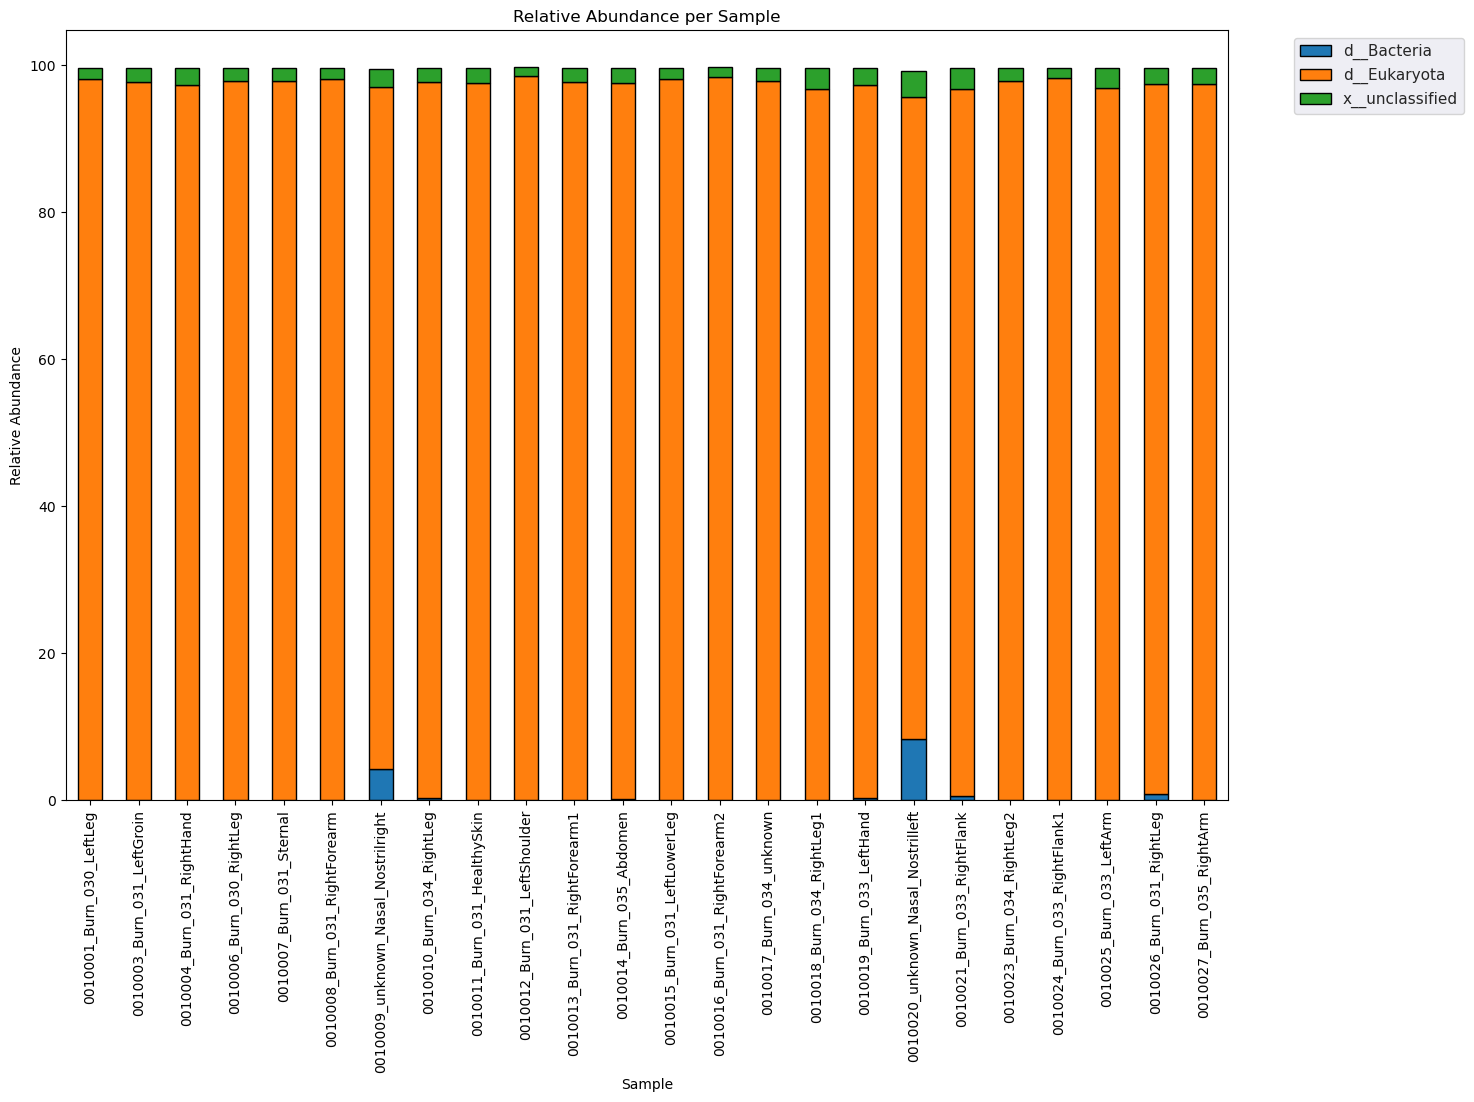

In [4]:
kingdom_stacked_kraken(kraken_bowtie)

In [5]:
kraken_bowtie

,clade_name,estimated_number_of_reads_from_the_clade,relative_abundance,sample
0,x__unclassified,220170,2.89,0010018_Burn_034_RightLeg1
1,r__root,7398610,97.11,0010018_Burn_034_RightLeg1
2,x__cellular_organisms,7396414,97.08,0010018_Burn_034_RightLeg1
3,d__Eukaryota,7367426,96.70,0010018_Burn_034_RightLeg1
4,x__Opisthokonta,7205219,94.57,0010018_Burn_034_RightLeg1
...,...,...,...,...
7153,d__Viruses|k__Pararnavirae|p__Artverviricota|c...,6,0.00,0010006_Burn_030_RightLeg
7154,d__Viruses|k__Pararnavirae|p__Artverviricota|c...,2,0.00,0010006_Burn_030_RightLeg
7155,x__unclassified_Gammaretrovirus,1,0.00,0010006_Burn_030_RightLeg
7156,d__Viruses|k__Pararnavirae|p__Artverviricota|c...,1,0.00,0010006_Burn_030_RightLeg


In [6]:
filtered_kraken = kraken_bowtie[kraken_bowtie["estimated_number_of_reads_from_the_clade"] >= 10]
filtered_kraken = filtered_kraken[filtered_kraken["clade_name"].str.contains("d__Bacteria") & filtered_kraken["clade_name"].str.contains("s__")]
filtered_kraken.loc[:, 'clade_name'] = filtered_kraken['clade_name'].str.split('s__').str[-1]
filtered_kraken = filtered_kraken.pivot(index = 'sample', columns = 'clade_name', values = 'relative_abundance')
filtered_kraken.replace(0.0, np.nan, inplace=True)
thresh = int(0.1 * len(filtered_kraken))
filtered_kraken.dropna(thresh=thresh, axis=1, inplace=True)
filtered_kraken

clade_name,Corynebacterium_accolens,Corynebacterium_tuberculostearicum,Cutibacterium_acnes,Cutibacterium_granulosum,Pseudomonas_aeruginosa,Staphylococcus_capitis,Staphylococcus_epidermidis
sample,,,,,,,
0010003_Burn_031_LeftGroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0010004_Burn_031_RightHand,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0010006_Burn_030_RightLeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0010007_Burn_031_Sternal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0010008_Burn_031_RightForearm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0010009_unknown_Nasal_Nostrilright,0.88,0.01,0.29,0.01,NaN,0.02,0.18
0010010_Burn_034_RightLeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0010011_Burn_031_HealthySkin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0010012_Burn_031_LeftShoulder,NaN,NaN,NaN,NaN,NaN,NaN,NaN


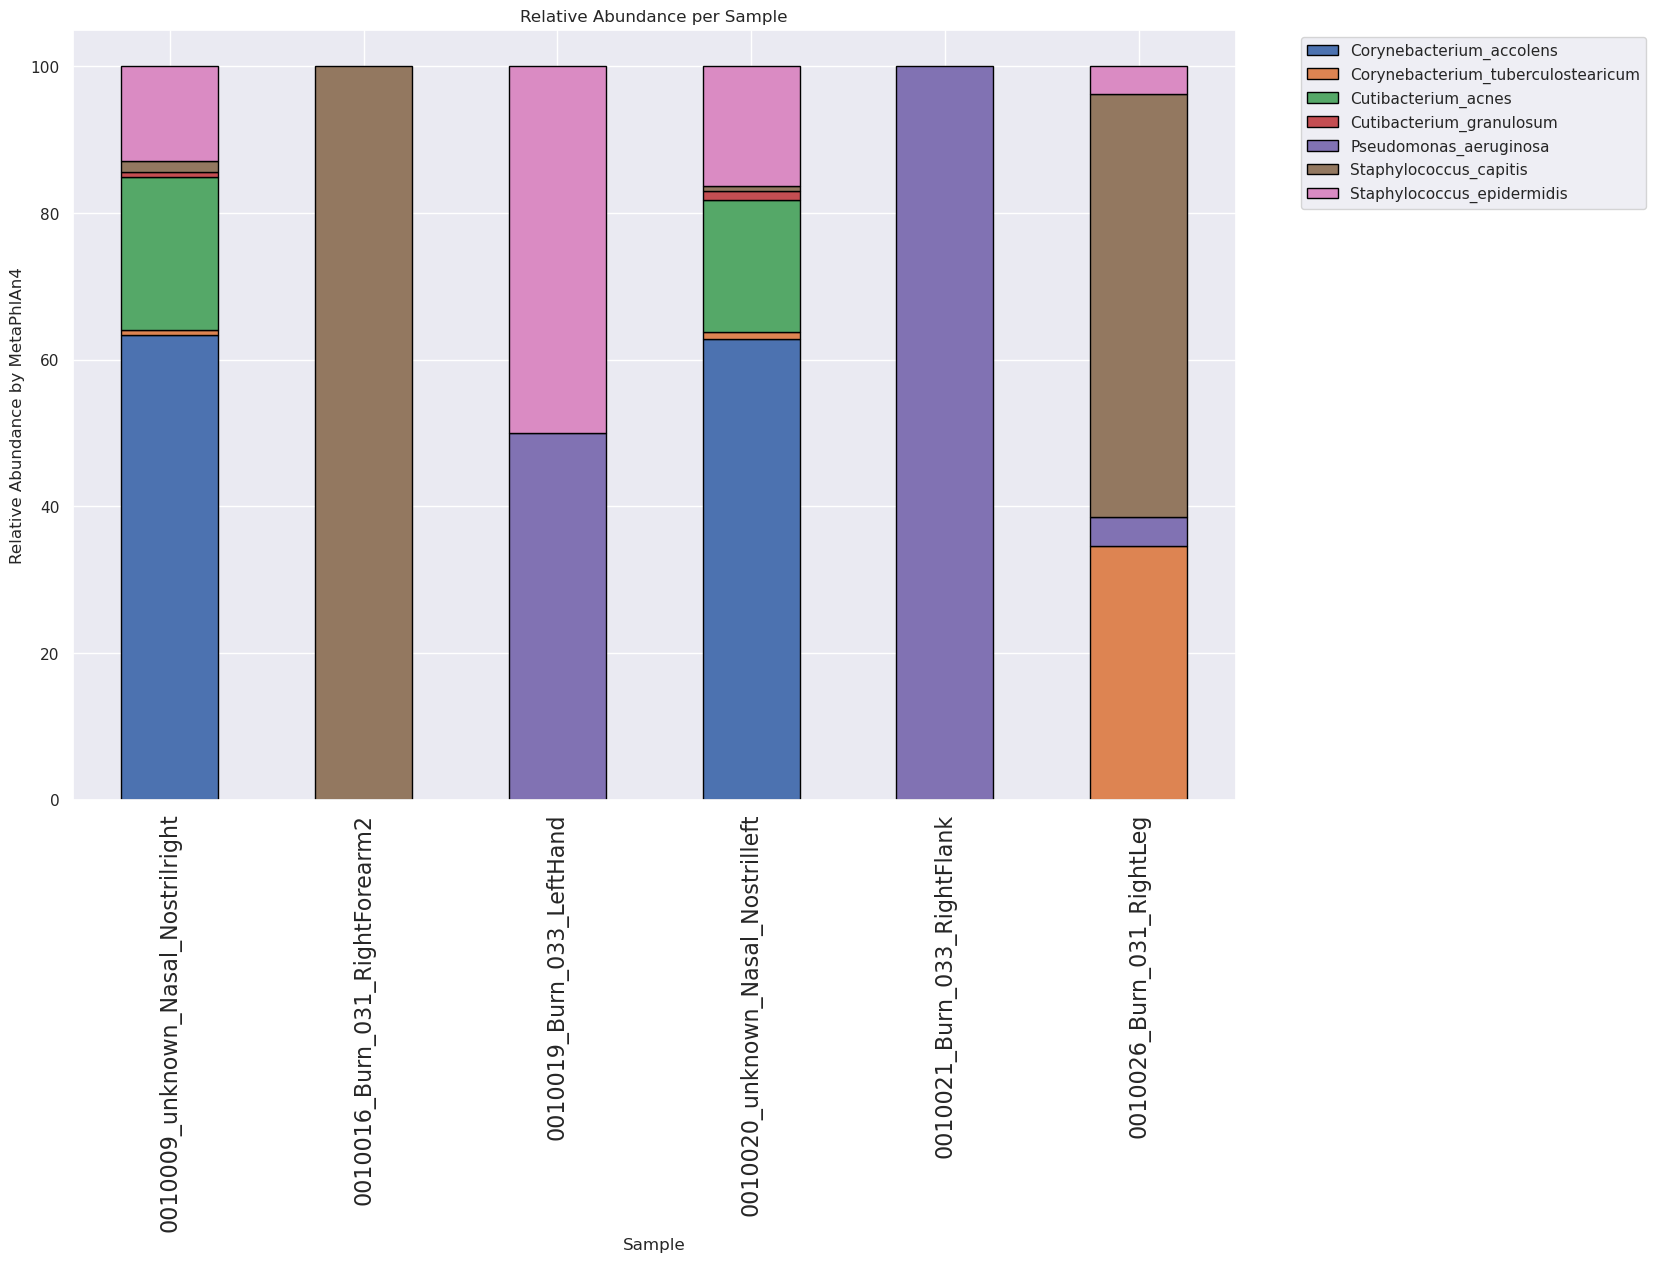

In [7]:
filtered_kraken = kraken_bowtie[kraken_bowtie["estimated_number_of_reads_from_the_clade"] >= 10]
filtered_kraken = filtered_kraken[filtered_kraken["clade_name"].str.contains("d__Bacteria") & filtered_kraken["clade_name"].str.contains("s__")]
filtered_kraken.loc[:, 'clade_name'] = filtered_kraken['clade_name'].str.split('s__').str[-1]
filtered_kraken = filtered_kraken.pivot(index = 'sample', columns = 'clade_name', values = 'relative_abundance')
filtered_kraken.replace(0.0, np.nan, inplace=True)
thresh = int(0.1 * len(filtered_kraken))
filtered_kraken.dropna(thresh=thresh, axis=1, inplace=True)


thresh = int(0.1 * len(filtered_kraken))
filtered_kraken.dropna(thresh=thresh, axis=1, inplace=True)
filtered_kraken_filled = filtered_kraken[filtered_kraken.sum(axis=1) != 0]
filtered_kraken_filled = filtered_kraken_filled.div(filtered_kraken_filled.sum(axis=1), axis=0).multiply(100)

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(15, 10))
filtered_kraken_filled.plot(kind='bar', stacked=True, ax=ax, edgecolor='black')

# Set the Seaborn style
sns.set()

# Add labels and title
ax.set_xlabel('Sample')
ax.set_ylabel('Relative Abundance by MetaPhlAn4')
ax.set_title('Relative Abundance per Sample')

# Move the legend outside of the figure
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', labelsize=16)

plt.show()

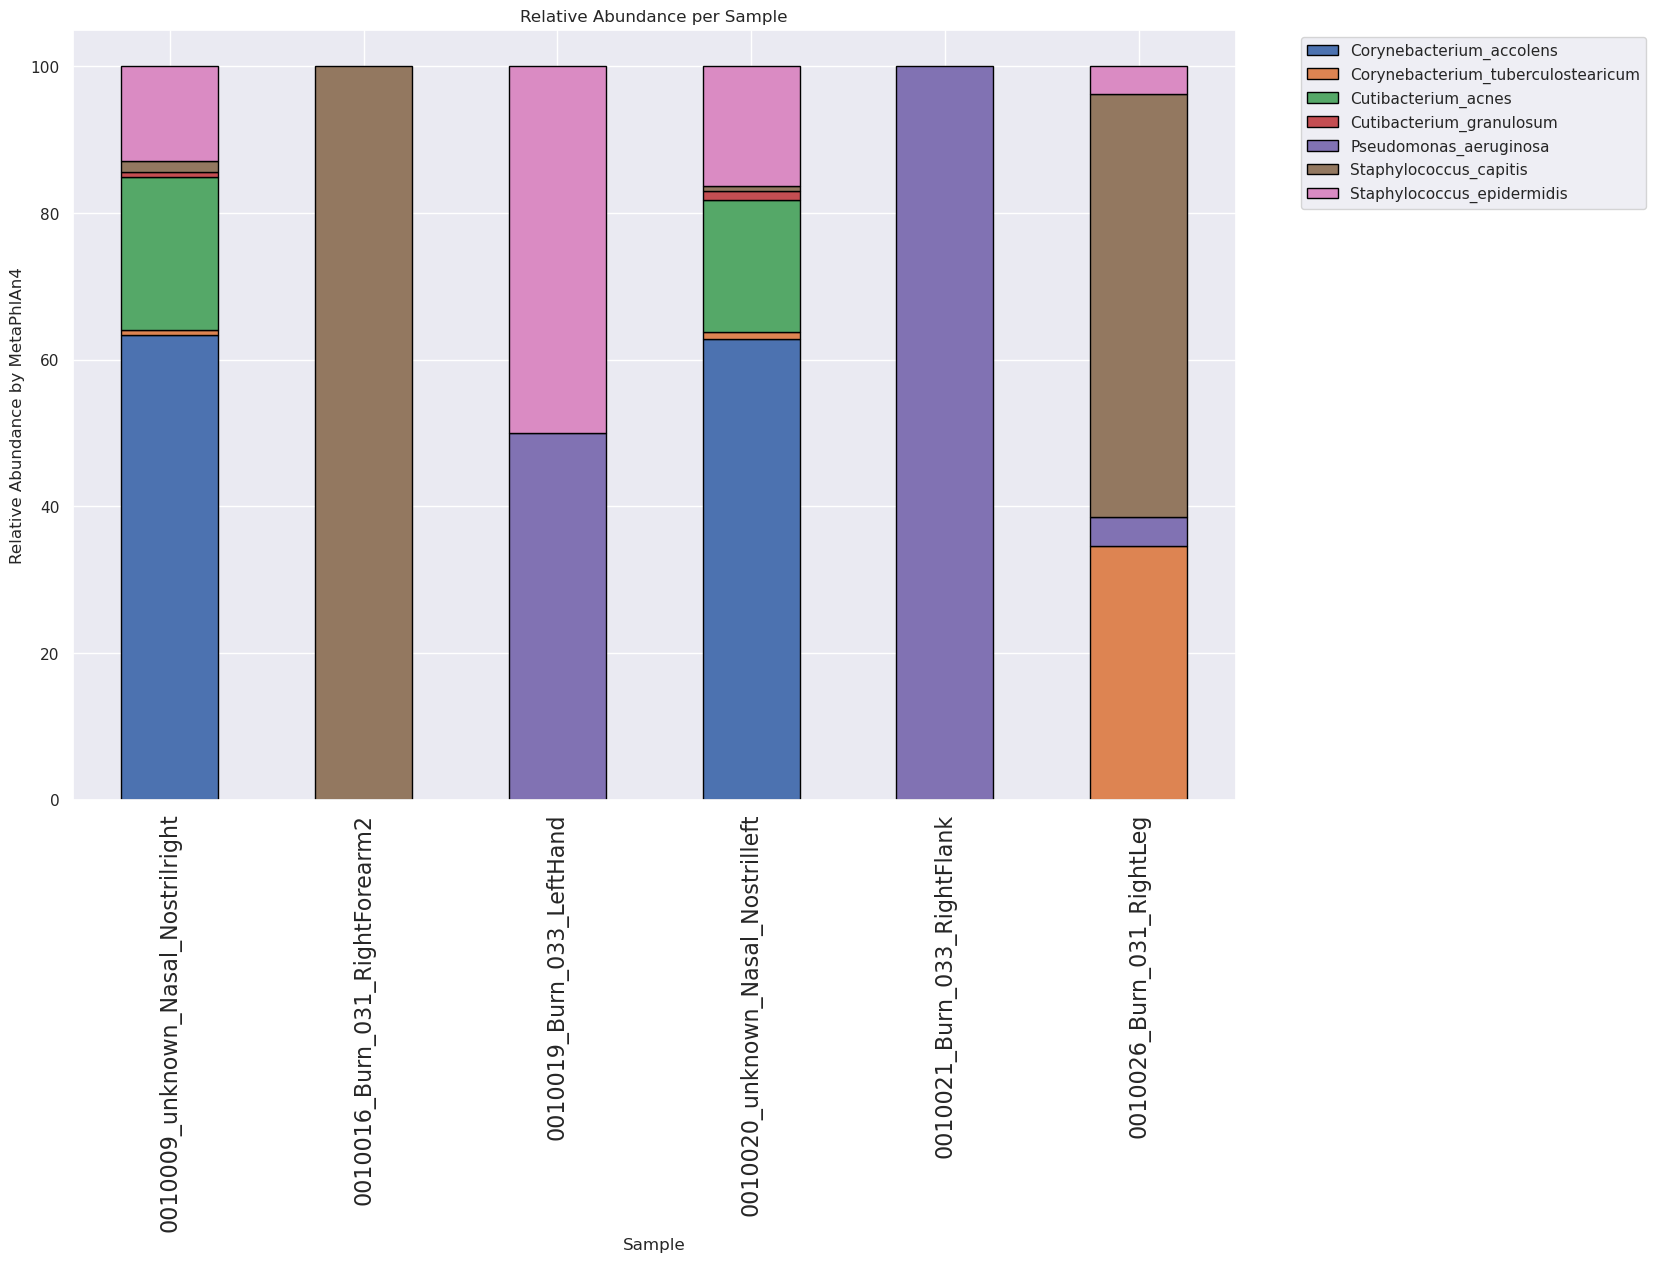

In [8]:
# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(15, 10))
filtered_kraken_filled.plot(kind='bar', stacked=True, ax=ax, edgecolor='black')

# Set the Seaborn style
sns.set()

# Add labels and title
ax.set_xlabel('Sample')
ax.set_ylabel('Relative Abundance by MetaPhlAn4')
ax.set_title('Relative Abundance per Sample')

# Move the legend outside of the figure
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', labelsize=16)

plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [47]:
kraken_bowtie = pd.read_csv("../../results/Kraken2/metaphlan_style_reports/kraken2_output_merged.csv")
kraken_bowtie

,clade_name,estimated_number_of_reads_from_the_clade,relative_abundance,sample
0,x__unclassified,220170,2.89,0010018_Burn_034_RightLeg1
1,r__root,7398610,97.11,0010018_Burn_034_RightLeg1
2,x__cellular_organisms,7396414,97.08,0010018_Burn_034_RightLeg1
3,d__Eukaryota,7367426,96.70,0010018_Burn_034_RightLeg1
4,x__Opisthokonta,7205219,94.57,0010018_Burn_034_RightLeg1
...,...,...,...,...
7153,d__Viruses|k__Pararnavirae|p__Artverviricota|c...,6,0.00,0010006_Burn_030_RightLeg
7154,d__Viruses|k__Pararnavirae|p__Artverviricota|c...,2,0.00,0010006_Burn_030_RightLeg
7155,x__unclassified_Gammaretrovirus,1,0.00,0010006_Burn_030_RightLeg
7156,d__Viruses|k__Pararnavirae|p__Artverviricota|c...,1,0.00,0010006_Burn_030_RightLeg


In [48]:
def shift_row(row):
    if row[0] == 'd__Bacteria':
        return pd.Series([row[0]] + [None] + list(row[1:-1]))
    else:
        return row

In [49]:
split_df = kraken_bowtie['clade_name'].str.split('|', expand=True)
split_df = split_df.apply(shift_row, axis=1)
split_df.columns = ["d__", "k__", "p__", "c__", "o__", "f__", "g__", "s__",]
for col in split_df.columns:
    split_df[col] = split_df[col].str.split('__', expand=True)[1]

# Define a dictionary for renaming the columns
rename_dict = {
    "d__": "Domain",
    "k__": "Kingdom",
    "p__": "Phylum",
    "c__": "Class",
    "o__": "Order",
    "f__": "Family",
    "g__": "Genus",
    "s__": "Species"
}

split_df.rename(columns=rename_dict, inplace=True)
kraken_bowtie = kraken_bowtie.join(split_df)
kraken_bowtie = kraken_bowtie.drop(columns=['clade_name'])
kraken_bowtie

,estimated_number_of_reads_from_the_clade,relative_abundance,sample,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,220170,2.89,0010018_Burn_034_RightLeg1,unclassified,None,None,None,None,None,None,None
1,7398610,97.11,0010018_Burn_034_RightLeg1,root,None,None,None,None,None,None,None
2,7396414,97.08,0010018_Burn_034_RightLeg1,cellular_organisms,None,None,None,None,None,None,None
3,7367426,96.70,0010018_Burn_034_RightLeg1,Eukaryota,None,None,None,None,None,None,None
4,7205219,94.57,0010018_Burn_034_RightLeg1,Opisthokonta,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
7153,6,0.00,0010006_Burn_030_RightLeg,Viruses,Pararnavirae,Artverviricota,Revtraviricetes,Ortervirales,Retroviridae,Gammaretrovirus,None
7154,2,0.00,0010006_Burn_030_RightLeg,Viruses,Pararnavirae,Artverviricota,Revtraviricetes,Ortervirales,Retroviridae,Gammaretrovirus,Kirsten_murine_sarcoma_virus
7155,1,0.00,0010006_Burn_030_RightLeg,unclassified_Gammaretrovirus,None,None,None,None,None,None,None
7156,1,0.00,0010006_Burn_030_RightLeg,Viruses,Pararnavirae,Artverviricota,Revtraviricetes,Ortervirales,Retroviridae,Gammaretrovirus,Spleen_focus-forming_virus


In [50]:
kraken_bowtie.to_csv("./kraken_modified.csv")

# RELATIVE READ ABUNDACE